### Pescod_Henry_DA201_Assignment_Jupyter_Notebook

# Diagnostic Analysis of NHS Appointment Data using Python

## Analytical Approach

Analysis of the problem

2 main questions posed by NHS are:

1. has there been adequate staff and capacity in the networks?
2. what as the actual utlisation of resources?

An additional question identified by the NHS
3. The problem of missed appointments, the reasons for which need to be better understood 

Sections of the report 
1. Importing the necessary libraries and datasets provided and sensecheck data
2. Explore the datasets 
3. What is the actual utlisation of resources?
4. Is there adequate staff and capacity in the networks?
5. The problem of missed appointments
6. Identifying trends in X (FKA Twitter) engagement relating to healthcare in the UK

## Section 1.Importing the necessary libraries and datasets provided and sensecheck

In [30]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Import and the data sets

ad = pd.read_csv('actual_duration.csv')
ar = pd.read_csv('appointments_regional.csv')
nc = pd.read_excel('national_categories.xlsx')
tweets = pd.read_csv('tweets.csv')

In [32]:
# Determine the info of the data sets
print("actual_duration dataset information: ")
ad.info()
print("\n" + "-"*50 + "\n")

print("appointments_regional dataset information: ")
ar.info()
print("\n" + "-"*50 + "\n")

print("national_category dataset information: ")
nc.info()
print("\n" + "-"*50 + "\n")

print("tweets dataset information: ")
tweets.info()
print("\n" + "-"*50 + "\n")

actual_duration dataset information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB

--------------------------------------------------

appointments_regional dataset information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                        

In [33]:
# Determine whether there are missing values in the data sets.

ad_na = ad[ad.isna().any(axis=1)]
ar_na = ad[ad.isna().any(axis=1)]
nc_na = ad[ad.isna().any(axis=1)]
tweets_na = tweets[tweets.isna().any(axis=1)]

# Print the number of rows with missing values for each data frame
print("Number of rows with missing values in 'ad' dataset:", ad_na.shape[0])
print("Number of rows with missing values in 'ar' dataset:", ar_na.shape[0])
print("Number of rows with missing values in 'nc' dataset:", nc_na.shape[0])
print("Number of rows with missing values in 'tweets' dataset:", tweets_na.shape[0])

Number of rows with missing values in 'ad' dataset: 0
Number of rows with missing values in 'ar' dataset: 0
Number of rows with missing values in 'nc' dataset: 0
Number of rows with missing values in 'tweets' dataset: 167


##### Insight
- This tells us there are no rows with missing values in 3 of the data sets ad, ar and nc.
- The tweets data set contains 167 rows of missing values. This suggests checking the data set more closely assess whether these missing will affect the data quality

In [35]:
# Looking at the tweets dataset more closely to identity which columns have missing values in the rows identified above
missing_columns = tweets_na.isna().sum()

# Filter columns that have missing values
columns_with_missing_values = missing_columns[missing_columns > 0]

# Display columns with missing values
print("Columns with missing values:")
print(columns_with_missing_values)

Columns with missing values:
tweet_entities_hashtags    167
dtype: int64


##### Insight
 - The 167 rows with missing values appear in the 'tweets_entities_hastags' column which suggests all the missing values relate to tweets without any hashtags. This will not affect the data quality.

In [37]:
# Determine the descriptive statistics of the data sets.

# Set the float format to display without decimal places
pd.options.display.float_format = '{:.0f}'.format

print("Descriptive Statistics for 'ad' dataset:")
print(ad.describe())
print("\n" + "-"*50 + "\n")

print("Descriptive Statistics for 'ar' dataset:")
print(ar.describe())
print("\n" + "-"*50 + "\n")

print("Descriptive Statistics for 'nc' dataset:")
print(nc.describe())
print("\n" + "-"*50 + "\n")

print("Descriptive Statistics for 'tweets' dataset:")
print(tweets.describe())
print("\n" + "-"*50 + "\n")

Descriptive Statistics for 'ad' dataset:
       count_of_appointments
count                 137793
mean                    1219
std                     1547
min                        1
25%                      194
50%                      696
75%                     1621
max                    15400

--------------------------------------------------

Descriptive Statistics for 'ar' dataset:
       count_of_appointments
count                 596821
mean                    1245
std                     5857
min                        1
25%                        7
50%                       47
75%                      308
max                   211265

--------------------------------------------------

Descriptive Statistics for 'nc' dataset:
                    appointment_date  count_of_appointments
count                         817394                 817394
mean   2022-01-16 00:50:35.860796160                    362
min              2021-08-01 00:00:00                      1
25%      

## Section 2. Explore the datasets

This section will look at the following questions
Q1: How many locations are there in the data set?
Q2: What are the five locations with the highest number of appointments?
Q3: How many service settings, context types, national categories, and appointment statuses are there?
Q4: Between what dates were appointments scheduled? 
Q5: Which service setting reported the most appointments in North West London from 1 January to 1 June 2022?
Q6: Which month had the highest number of appointments?

**Question 1:** How many locations are there in the data set?

In [40]:
# Determine the number of unique locations.

type_counts = ad['sub_icb_location_name'].value_counts()
num_locations = len(type_counts)
print(f"Number of unique locations: {num_locations}")


Number of unique locations: 106


**Question 2:** What are the five locations with the highest number of appointments?

In [42]:
# # Group by location and sum the counts of appointments in the ad Dataset

total_by_location_name = ad.groupby('sub_icb_location_name')['count_of_appointments'].sum().sort_values(ascending=False)

# Calculate the % total of appointments by service setting in the nc dataset
# Create a DataFrame to display the results
location_appointments_ad = total_by_location_name.reset_index()
location_appointments_ad.columns = ['sub_icb_location_name', 'count_of_appointments']
location_appointments_ad['percent_of_total'] = (location_appointments_ad['count_of_appointments'] / total_by_location_name.sum() * 100).round(1)

# Print the top 5 results of the DataFrame
print("Top 5 locations with the highest number of appointments:")
print(location_appointments_ad.head(5))

# Print the grand total
print("Total no of appointments :", total_by_location_name.sum())

Top 5 locations with the highest number of appointments:
                         sub_icb_location_name  count_of_appointments  \
0            NHS North West London ICB - W2U3Z                6976986   
1            NHS North East London ICB - A3A8R                5341883   
2                NHS Kent and Medway ICB - 91Q                5209641   
3  NHS Hampshire and Isle Of Wight ICB - D9Y0V                4712737   
4              NHS South East London ICB - 72Q                4360079   

   percent_of_total  
0                 4  
1                 3  
2                 3  
3                 3  
4                 3  
Total no of appointments : 167980692


##### Insight
- Top 5 locations (4.7% of total 106 locations) account for 16% of the total number of appointments, with 4 of the top 5 locations based in the south east of England.  The is likely due to the high population density in those areas.
- Further analysis could look at mapping population data to the appointment datasets to look for any interesting trends between population density and number of appointments. 

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [45]:
# Count number of appointments by service setting in the nc dataset

total_by_service_setting = nc.groupby('service_setting')['count_of_appointments'].sum().sort_values(ascending=False)

# Calculate the % total of appointments by service setting in the nc dataset
# Create a DataFrame to display the results
results_df_0 = total_by_service_setting.reset_index()
results_df_0.columns = ['service_setting', 'count_of_appointments']
results_df_0['percent_of_total'] = (results_df_0['count_of_appointments'] / total_by_service_setting.sum() * 100).round(1)

# Print the results DataFrame
print("\nTotal by service setting:")
print(results_df_0)

# Print the grand total
print("Total no of appointments :", total_by_service_setting.sum())


Total by service setting:
             service_setting  count_of_appointments  percent_of_total
0           General Practice              270811691                92
1                   Unmapped               11080810                 4
2       Primary Care Network                6557386                 2
3                      Other                5420076                 2
4  Extended Access Provision                2176807                 1
Total no of appointments : 296046770


In [46]:
# Count number of appointments by context types in the nc dataset

total_by_context_type = nc.groupby('context_type')['count_of_appointments'].sum().sort_values(ascending=False)

# Calculate the % total of appointments by context type in the nc dataset
# Create a DataFrame to display the results
results_df_1 = total_by_context_type.reset_index()
results_df_1.columns = ['context_type', 'count_of_appointments']
results_df_1['percent_of_total'] = (results_df_1['count_of_appointments'] / total_by_context_type.sum() * 100).round(1)

# Print the results DataFrame
print("\nTotal by context type:")
print(results_df_1)

# Print the grand total
print("Total no of appointments :", total_by_context_type.sum())


Total by context type:
             context_type  count_of_appointments  percent_of_total
0  Care Related Encounter              257075158                87
1    Inconsistent Mapping               27890802                 9
2                Unmapped               11080810                 4
Total no of appointments : 296046770


In [47]:
# Calculate total number of appointments by national category 

# Group by 'National Category' and sum the 'count_of_appointments' for each type
total_by_national_category = nc.groupby('national_category')['count_of_appointments'].sum().sort_values(ascending=False)

# Calculate the % total of appointments by national cateogory in the nc dataset
# Create a DataFrame to display the results
results_df_2 = total_by_national_category.reset_index()
results_df_2.columns = ['national_category', 'count_of_appointments']
results_df_2['percent_of_total'] = (results_df_2['count_of_appointments'] / total_by_national_category.sum() * 100).round(1)

# Display options to increase the table width and display it properly
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

# Print the results DataFrame
print("\nTotal by national category:")
print(results_df_2)

# Print the grand total
print("\nGrand Total of All Appointments:", total_by_national_category.sum())


Total by national category:
                                                      national_category  count_of_appointments  percent_of_total
0                                          General Consultation Routine               97271522                33
1                                            General Consultation Acute               53691150                18
2                                                       Clinical Triage               41546964                14
3                                                       Planned Clinics               28019748                10
4                                                  Inconsistent Mapping               27890802                 9
5                                            Planned Clinical Procedure               25702694                 9
6                                                              Unmapped               11080810                 4
7                                           Unplanned Clinical Acti

##### Insight
- A third of all appointments in nc dataset as classed as General Consultation Routine
- 13% of appointments are incorrectly mapped, which suggests some further investigation could be made by NHS into data handling practices. 
- 3% of all appointments are across 8 categorys. Further investigation could be done as to whether these categories could be combined into others. 

In [49]:
# Determine the number of appoinments by appointment status

# Group by 'no of appoinments' and sum the 'count_of_appointments' for each type
total_by_appointment_status = ar.groupby('appointment_status')['count_of_appointments'].sum().sort_values(ascending=False)

# Calculate the % total of appointments by appointment status in the nc dataset
# Create a DataFrame to display the results
results_df_3 = total_by_appointment_status.reset_index()
results_df_3.columns = ['appointment_status', 'count_of_appointments']
results_df_3['percent_of_total'] = (results_df_3['count_of_appointments'] / total_by_appointment_status.sum() * 100).round(1)

# Display options to increase the table width and display it properly
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

# Print the results DataFrame
print("\nTotal by appointment status:")
print(results_df_3)

# Print the grand total
print("\nGrand Total of All Appointments:", total_by_appointment_status.sum())


Total by appointment status:
  appointment_status  count_of_appointments  percent_of_total
0           Attended              677755876                91
1            Unknown               34137416                 5
2                DNA               30911233                 4

Grand Total of All Appointments: 742804525


##### Insight  
- 91% of appointments in the nc dataset are classed as attended.
- 4% of appointments in the nc dataset are classed as missed. Section 5 of this report will look missed appointments in more detail. 
- 5% of appointments are classed as unknown, which suggests some further investigation could be made by NHS into data handling practices. 
- Further analysis could look into benchmarking analysis comparing these figures to countries with similar demographies and healthcare systems. 

**Question 4:** Between what dates were appointments scheduled? 

In [52]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.

ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [53]:
# View the first five rows of appointment_date for the nc DataFrame to determine the date format.

nc.head()

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08


In [54]:
# View the first five rows of appointment_date for the ar DataFrame to determine the date format.

ar.head()

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [55]:
# Change the date format of ad['appointment_date'].

# check current date format of appointment_date

print(ad['appointment_date'].dtype)

object


In [56]:
# Convert 'appointment_date' to datetime format
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

print(ad['appointment_date'].dtype)

datetime64[ns]


In [57]:
# Convert 'appointment_date' to datetime format using the correct format
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'], format='%d-%b-%y')

# Use strftime to change the format to 'YYYY-MM-DD'
ad['appointment_date'] = ad['appointment_date'].dt.strftime('%Y-%m-%d')

# View the DateFrame.
ad.head()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [58]:
# Change the date format of ar['appointment_date'].

# check current date format of appointment_date

print(ar['appointment_month'].dtype)

object


In [59]:
# Convert ar'appointment_month' to datetime format
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'])

print(ar['appointment_month'].dtype)

datetime64[ns]


In [60]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.

print("Minimum date in the ad DataFrame: ", ad['appointment_date'].min())
print("Maximum date in the ad DataFrame: ", ad['appointment_date'].max())

Minimum date in the ad DataFrame:  2021-12-01
Maximum date in the ad DataFrame:  2022-06-30


In [61]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.

print("Minimum date in the nc DataFrame: ", nc['appointment_date'].min())
print("Maximum date in the nc DataFrame: ", nc['appointment_date'].max())

Minimum date in the nc DataFrame:  2021-08-01 00:00:00
Maximum date in the nc DataFrame:  2022-06-30 00:00:00


In [62]:
# Determine the minimum and maximum dates in the ar DataFrame.
# Use appropriate docstrings.

print("Minimum date in the ar DataFrame: ", ar['appointment_month'].min())
print("Maximum date in the ar DataFrame: ", ar['appointment_month'].max())

Minimum date in the ar DataFrame:  2020-01-01 00:00:00
Maximum date in the ar DataFrame:  2022-06-01 00:00:00


##### Insight: 
- The appointments were scheduled betweeen 1st December 2021 and 30th June 2022 in the Actual Duration Dataset
- The appointments were scheduled betweeen 1st August 2021 and 30th June 2022 in the National Category Dataset
- The appointments were scheduled between 1st Janaury 2020 and 1st June 2022 in the Appointments Regional Dataset

**Question 5:** Which service setting reported the most appointments in North West London from 1 January to 1 June 2022?

In [65]:
# For each of these service settings, determine the number of records available for the period and the location. 

# Define the location for filtering

location = 'NHS North West London ICB - W2U3Z'

# Define date range for filtering
start_date = '2022-01-01'
end_date = '2022-06-01'

# Filter the DataFrame by date range and location
nc_subset = nc[
            (nc['appointment_date'] >= start_date)\
            & (nc['appointment_date'] <= end_date)\
            & (nc['sub_icb_location_name'] == location)]

# Group by 'service_setting' and aggregate the 'count_of_appointments' column to total no of appointments by service setting
group_nc_subset = nc_subset.groupby('service_setting')[['count_of_appointments']]\
                    .agg('sum').reset_index()

# Sort values in ascending order
group_nc_subset_sort = group_nc_subset.sort_values(by='count_of_appointments',ascending=False)

# View the output
group_nc_subset_sort

,service_setting,count_of_appointments
1,General Practice,4804239
4,Unmapped,391106
2,Other,152897
3,Primary Care Network,109840
0,Extended Access Provision,98159


**Question 6:** Which month had the highest number of appointments?

In [67]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.

# Extract year and month from the 'date' column
nc['year_month'] = nc['appointment_date'].dt.to_period('M')

# Group by 'month' and sum the 'count_of_appointments' for each month
appointments_by_month = nc.groupby('year_month')['count_of_appointments'].sum()

# Print the number of appointments by month
print("Number of Appointments by Month:")
print(appointments_by_month)

Number of Appointments by Month:
year_month
2021-08    23852171
2021-09    28522501
2021-10    30303834
2021-11    30405070
2021-12    25140776
2022-01    25635474
2022-02    25355260
2022-03    29595038
2022-04    23913060
2022-05    27495508
2022-06    25828078
Freq: M, Name: count_of_appointments, dtype: int64


##### Insight
- Over the time period selected, the month with the most number of appointments November 2021 at 30,405,070, and the least being April with 2022 23,913,060
- Looks like ther is significant seasonal variation in the months which will be visualised in this report


## 3. What is the actual utlisation of resources?
The next questions focus on visualisations to identify:
- Q7 How do the number of appointments per month vary for service settings, context types, and national categories.
- Q8 How do the number of appointments vary by season

**Question 8 **: How do the number of appointments per month vary for service settings, context types, and national categories.

In [71]:
# Create aggregated dataframes for and convert dates to datetime format 

# Ensure 'appointment_month' is in datetime format for filtering
nc['appointment_month'] = pd.to_datetime(nc['appointment_month'], format='%Y-%m')

# Filter the data set to only look at data from 2021-08 onwards
filtered_nc = nc[nc['appointment_month'] >= '2021-08']

# Group by each feature separately and sum the count of appointments

# Aggregated by appointment_month
agg_by_month = filtered_nc.groupby(filtered_nc['appointment_month'].dt.to_period('M'))['count_of_appointments']\
                    .sum().reset_index()
agg_by_month['appointment_month'] = agg_by_month['appointment_month'].astype(str)

# Aggregated by service_setting and appointment_month
agg_by_service_setting = filtered_nc.groupby([filtered_nc['appointment_month'].dt.to_period('M'), 'service_setting'])['count_of_appointments']\
                    .sum().reset_index()
agg_by_service_setting['appointment_month'] = agg_by_service_setting['appointment_month'].astype(str)

# Aggregated by context_type and appointment_month
agg_by_context_type = filtered_nc.groupby([filtered_nc['appointment_month'].dt.to_period('M'), 'context_type'])['count_of_appointments']\
                    .sum().reset_index()
agg_by_context_type['appointment_month'] = agg_by_context_type['appointment_month'].astype(str)

# Aggregated by national_category and appointment_month
agg_by_national_category = filtered_nc.groupby([filtered_nc['appointment_month'].dt.to_period('M'), 'national_category'])['count_of_appointments']\
                    .sum().reset_index()
agg_by_national_category['appointment_month'] = agg_by_national_category['appointment_month'].astype(str)

# View the DataFrames
print("Aggregated by month:")
print(agg_by_month)
print("\nAggregated by month and service_setting:")
print(agg_by_service_setting)
print("\nAggregated by month and context_type:")
print(agg_by_context_type)
print("\nAggregated by month and national_category:")
print(agg_by_national_category)

Aggregated by month:
   appointment_month  count_of_appointments
0            2021-08               23852171
1            2021-09               28522501
2            2021-10               30303834
3            2021-11               30405070
4            2021-12               25140776
5            2022-01               25635474
6            2022-02               25355260
7            2022-03               29595038
8            2022-04               23913060
9            2022-05               27495508
10           2022-06               25828078

Aggregated by month and service_setting:
   appointment_month            service_setting  count_of_appointments
0            2021-08  Extended Access Provision                 160927
1            2021-08           General Practice               21575852
2            2021-08                      Other                 449101
3            2021-08       Primary Care Network                 432448
4            2021-08                   Unmapped       

**No of appointments by service setting:**

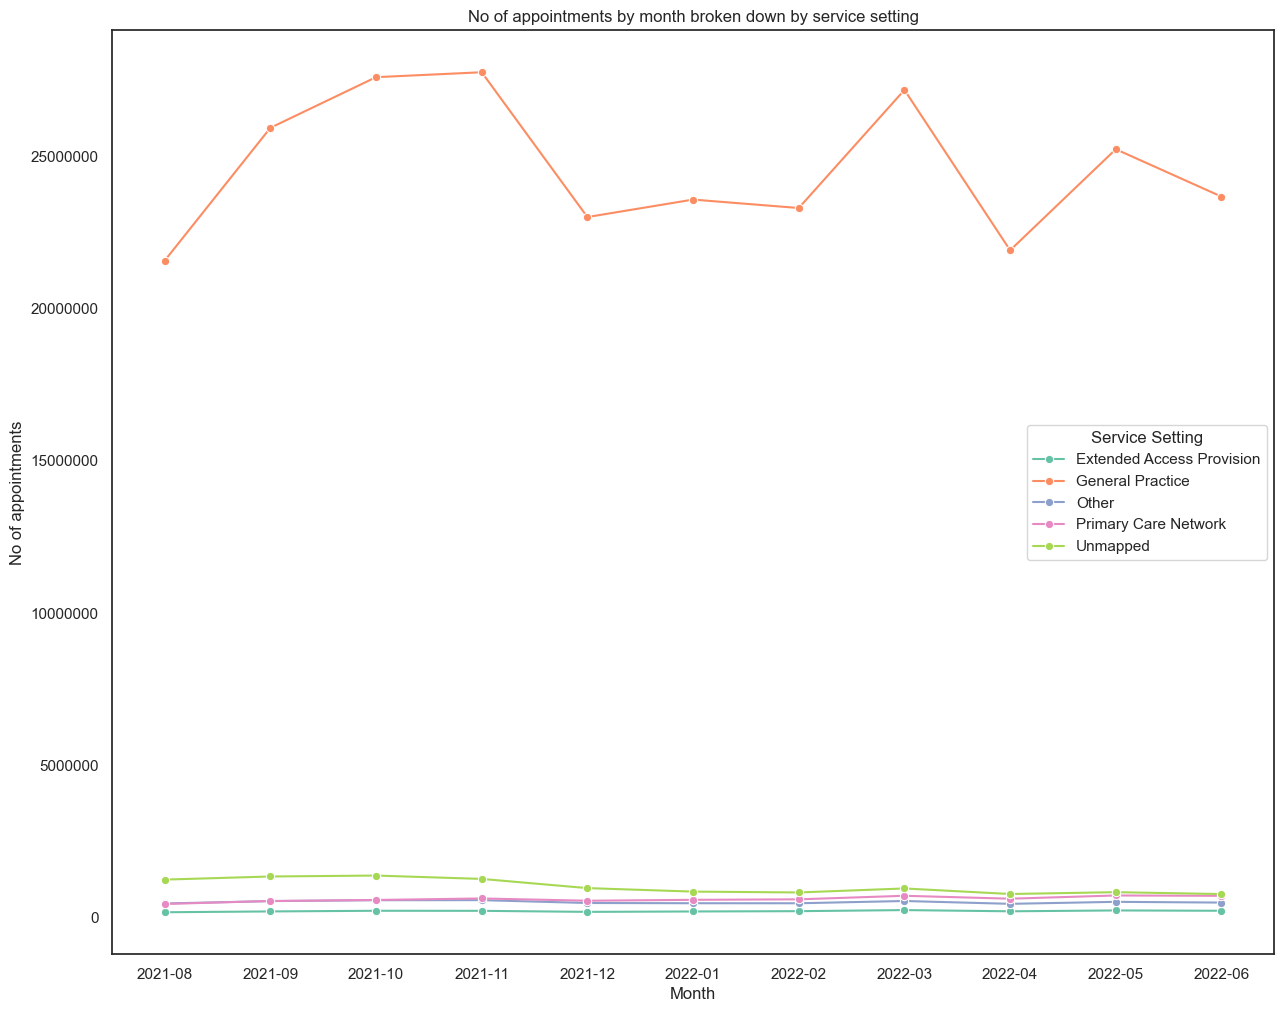

In [73]:
# Plot the appointments over the available date range, and review the service settings for months.

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')
            
# Create a lineplot.
ax = sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments', 
    hue='service_setting', 
    marker='o', 
    palette='Set2',
    data=agg_by_service_setting)

# Set labels
ax.set_xlabel("Month")
ax.set_ylabel("No of appointments")
ax.set_title("No of appointments by month broken down by service setting")


# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

# Format the legend
ax.legend(title="Service Setting")


**No of appointments by Context types:**

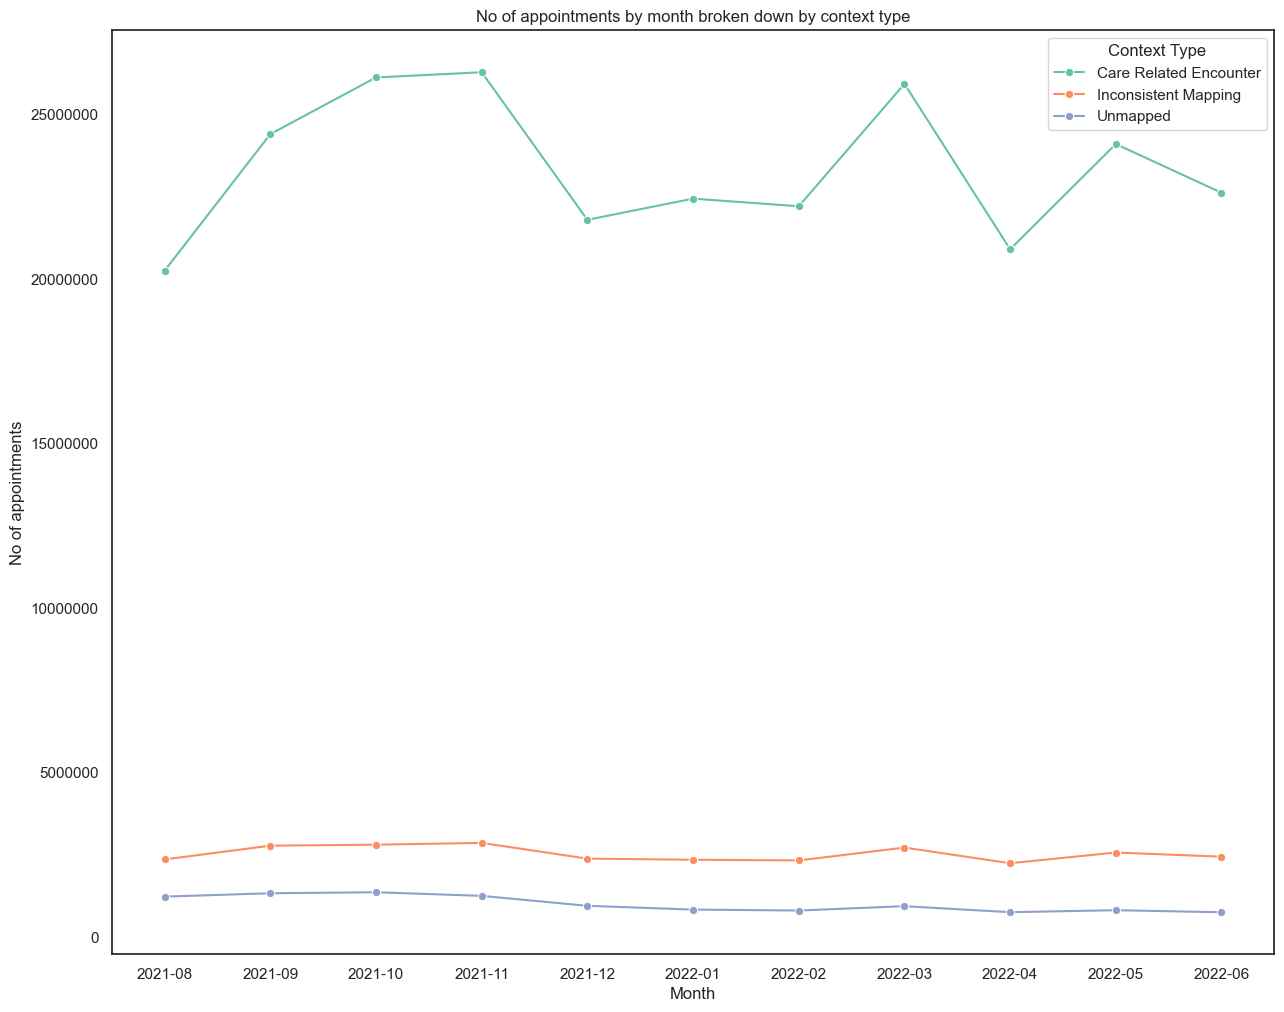

In [75]:
# Plot the appointments over the available date range, and review the context types for months.

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a lineplot.
ax= sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments', 
    hue='context_type', 
    marker='o', 
    palette='Set2',
    data=agg_by_context_type)

# Set labels
ax.set_xlabel("Month")
ax.set_ylabel("No of appointments")
ax.set_title("No of appointments by month broken down by context type")


# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

# Format the legend
ax.legend(title="Context Type")


**No of appointments by National categories:**

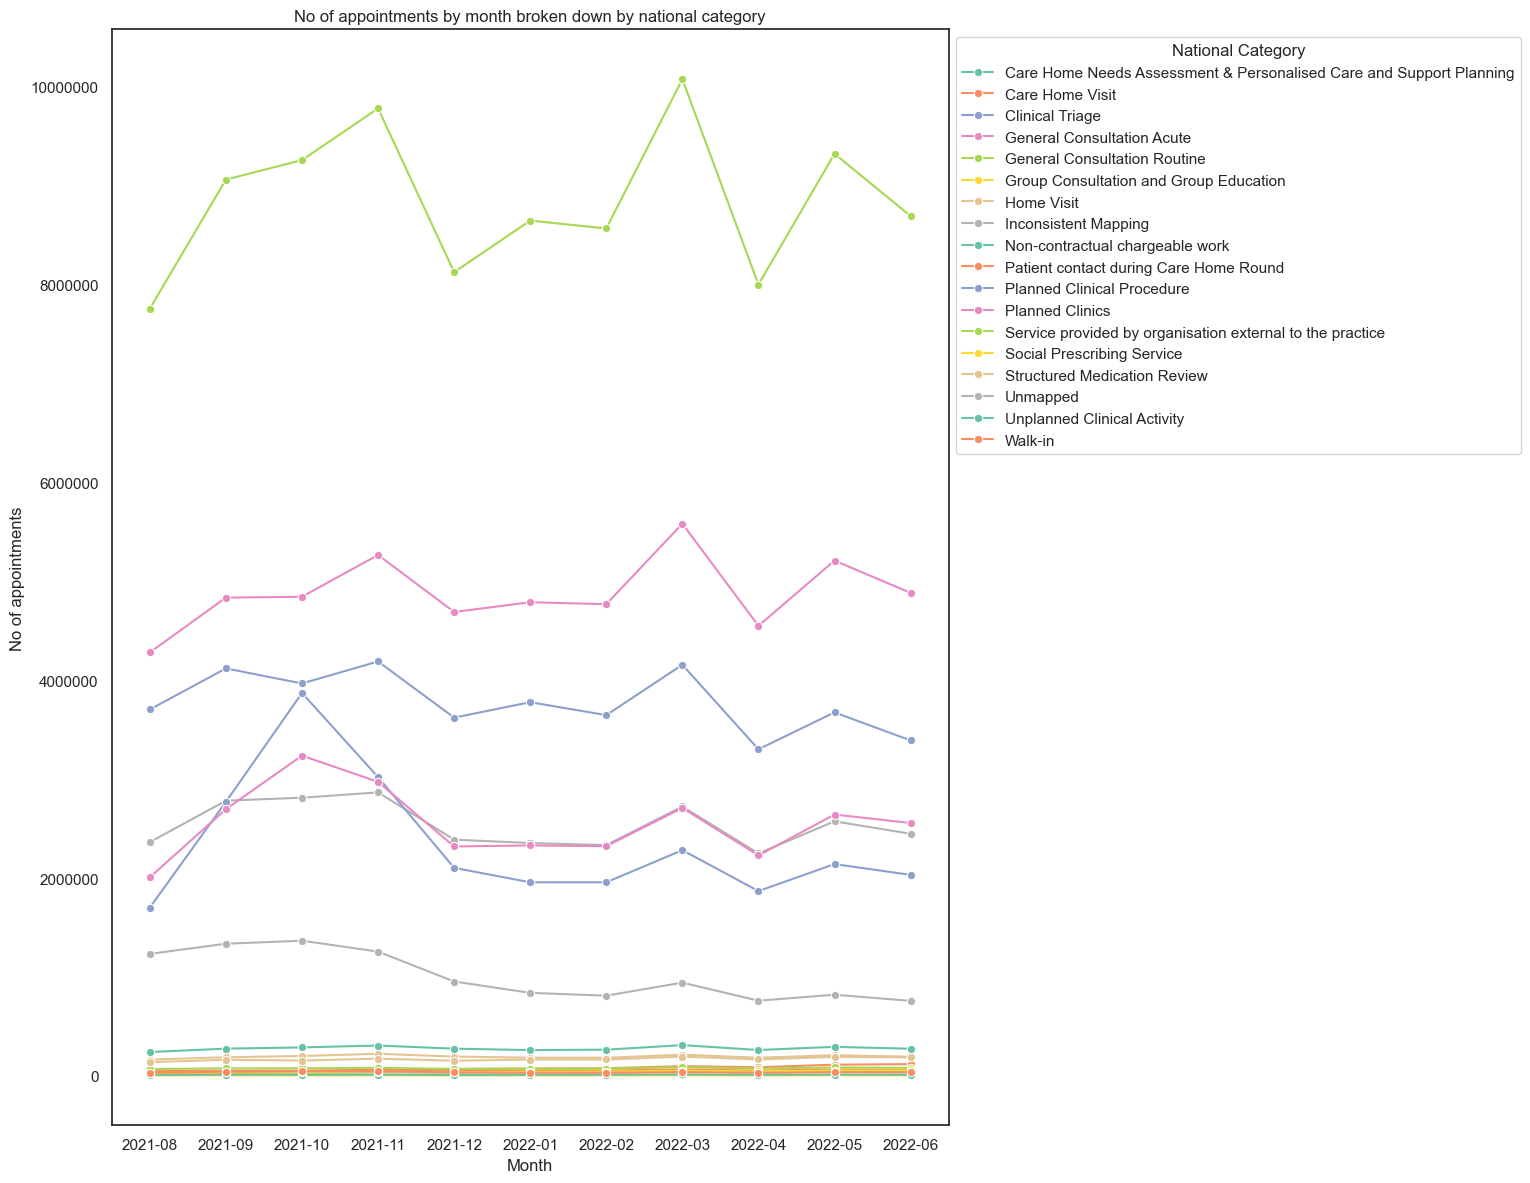

In [77]:
# Plot the appointments over the available date range, and review the national categories for months.

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a lineplot.
ax = sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments', 
    hue='national_category', 
    marker='o', 
    palette='Set2',
    data=agg_by_national_category)

# Set labels
ax.set_xlabel("Month")
ax.set_ylabel("No of appointments")
ax.set_title("No of appointments by month broken down by national category")


# Format the legend
ax.legend(title="National Category",
          bbox_to_anchor=[1,1])

# Adjust layout to ensure everything fits without overlapping
plt.tight_layout()

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

# Save the plot as a PNG file
plt.savefig("No of appointments by month broken down by national category.png", bbox_inches='tight')


**Question 8**  How do the number of appointments vary by season 

###### The seasons are summer (June to August 2021), autumn (September to November 2021), winter (December to February 2022), and spring (March to May 2022).

In [80]:
# Create aggregated dataframes that can be used in future weeks. 

# Ensure 'appointment_date' is in datetime format
nc['appointment_date'] = pd.to_datetime(nc['appointment_date'], format='%Y-%m-%d')

# Filter data for each season
# Summer (June to August 2021)
# The nc dataframe only starts at 2021-08-01 so note this will only be 1 month of data
summer21 = nc[(nc['appointment_date'] >= '2021-06-01') & (nc['appointment_date'] < '2021-09-01')]

# Autumn (September to November 2021)
autumn21 = nc[(nc['appointment_date'] >= '2021-09-01') & (nc['appointment_date'] < '2021-12-01')]

# Winter (December 2021 to February 2022)
winter21_22 = nc[(nc['appointment_date'] >= '2021-12-01') & (nc['appointment_date'] < '2022-03-01')]

# Spring (March to May 2022)
spring22 = nc[(nc['appointment_date'] >= '2022-03-01') & (nc['appointment_date'] < '2022-06-01')]

# Group by appointment_date and service_setting, and sum the count of appointments for each season
# This ensures data is aggregated by day
def aggregate_by_day_and_service(data):
    return data.groupby(['appointment_date', 'service_setting'])['count_of_appointments']\
               .sum().reset_index()

# Aggregated DataFrames
agg_summer21 = aggregate_by_day_and_service(summer21)
agg_autumn21 = aggregate_by_day_and_service(autumn21)
agg_winter21_22 = aggregate_by_day_and_service(winter21_22)
agg_spring22 = aggregate_by_day_and_service(spring22)

# View the DataFrames for each season
print("Summer 2021 Data:")
print(agg_summer21)

print("\nAutumn 2021 Data:")
print(agg_autumn21)

print("\nWinter 2021-2022 Data:")
print(agg_winter21_22)

print("\nSpring 2022 Data:")
print(agg_spring22)

Summer 2021 Data:
    appointment_date            service_setting  count_of_appointments
0         2021-08-01  Extended Access Provision                    438
1         2021-08-01           General Practice                   3411
2         2021-08-01                      Other                    401
3         2021-08-01       Primary Care Network                    323
4         2021-08-01                   Unmapped                   1054
..               ...                        ...                    ...
150       2021-08-31  Extended Access Provision                   8281
151       2021-08-31           General Practice                1125584
152       2021-08-31                      Other                  23181
153       2021-08-31       Primary Care Network                  21789
154       2021-08-31                   Unmapped                  62380

[155 rows x 3 columns]

Autumn 2021 Data:
    appointment_date            service_setting  count_of_appointments
0         2021-0

**Summer (June to August 2021):**

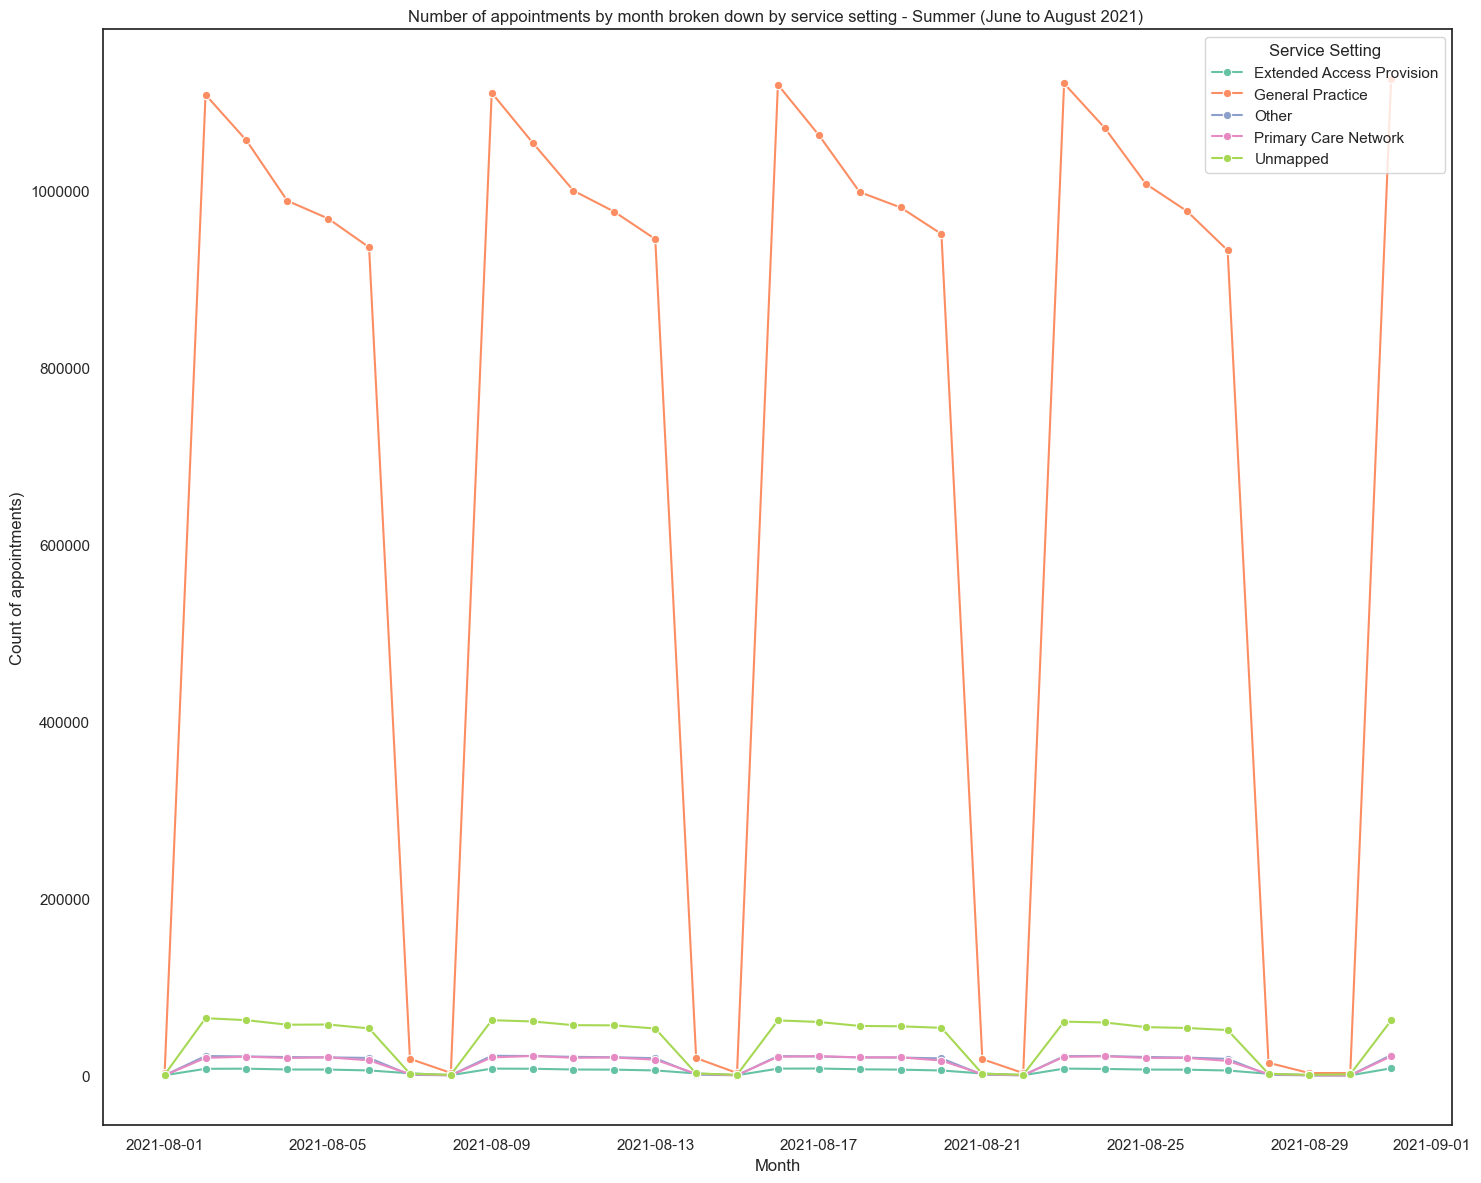

In [82]:
# Look at June to August 2021 in more detail to allow a closer look.

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')
            
# Create a lineplot.
ax = sns.lineplot(
    x='appointment_date', 
    y='count_of_appointments', 
    hue='service_setting', 
    marker='o', 
    palette='Set2',
    data=agg_summer21)

# Set labels
ax.set_xlabel("Month")
ax.set_ylabel("Count of appointments)")
ax.set_title("Number of appointments by month broken down by service setting - Summer (June to August 2021) ")

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

# Format the legend
ax.legend(title="Service Setting",
          loc='upper right',
          bbox_to_anchor=[1,1])

# Adjust layout to ensure everything fits without overlapping
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("Number of appointments by month broken down by service setting - Summer (June to August 2021).png")

**Autumn (September to November 2021):**

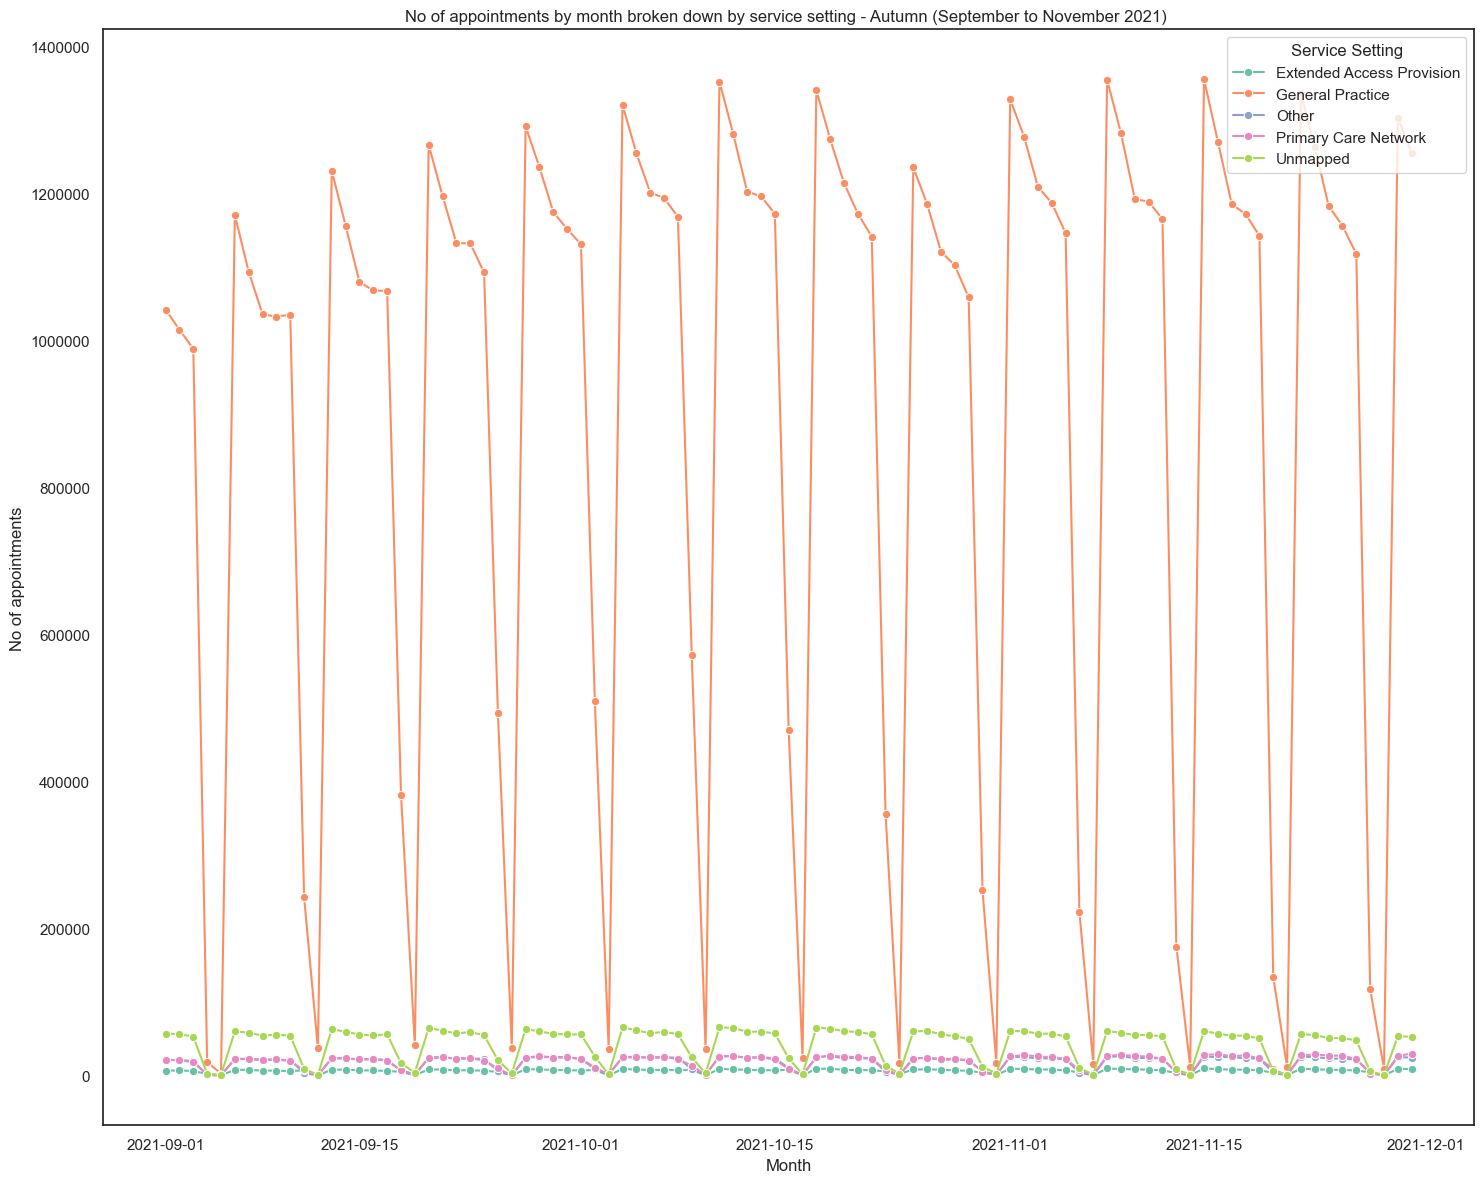

In [84]:
# Look at September to November 2021 in more detail to allow a closer look.

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a lineplot.
ax = sns.lineplot(
    x='appointment_date', 
    y='count_of_appointments', 
    hue='service_setting', 
    marker='o', 
    palette='Set2',
    data=agg_autumn21)

# Set labels
ax.set_xlabel("Month")
ax.set_ylabel("No of appointments")
ax.set_title("No of appointments by month broken down by service setting - Autumn (September to November 2021) ")

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

# Format the legend
ax.legend(title="Service Setting",
          loc='upper right',
          bbox_to_anchor=[1,1])

# Adjust layout to ensure everything fits without overlapping
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("No of appointments by month broken down by service setting - Autumn (September to November 2021).png")


**Winter (December to February 2022):**

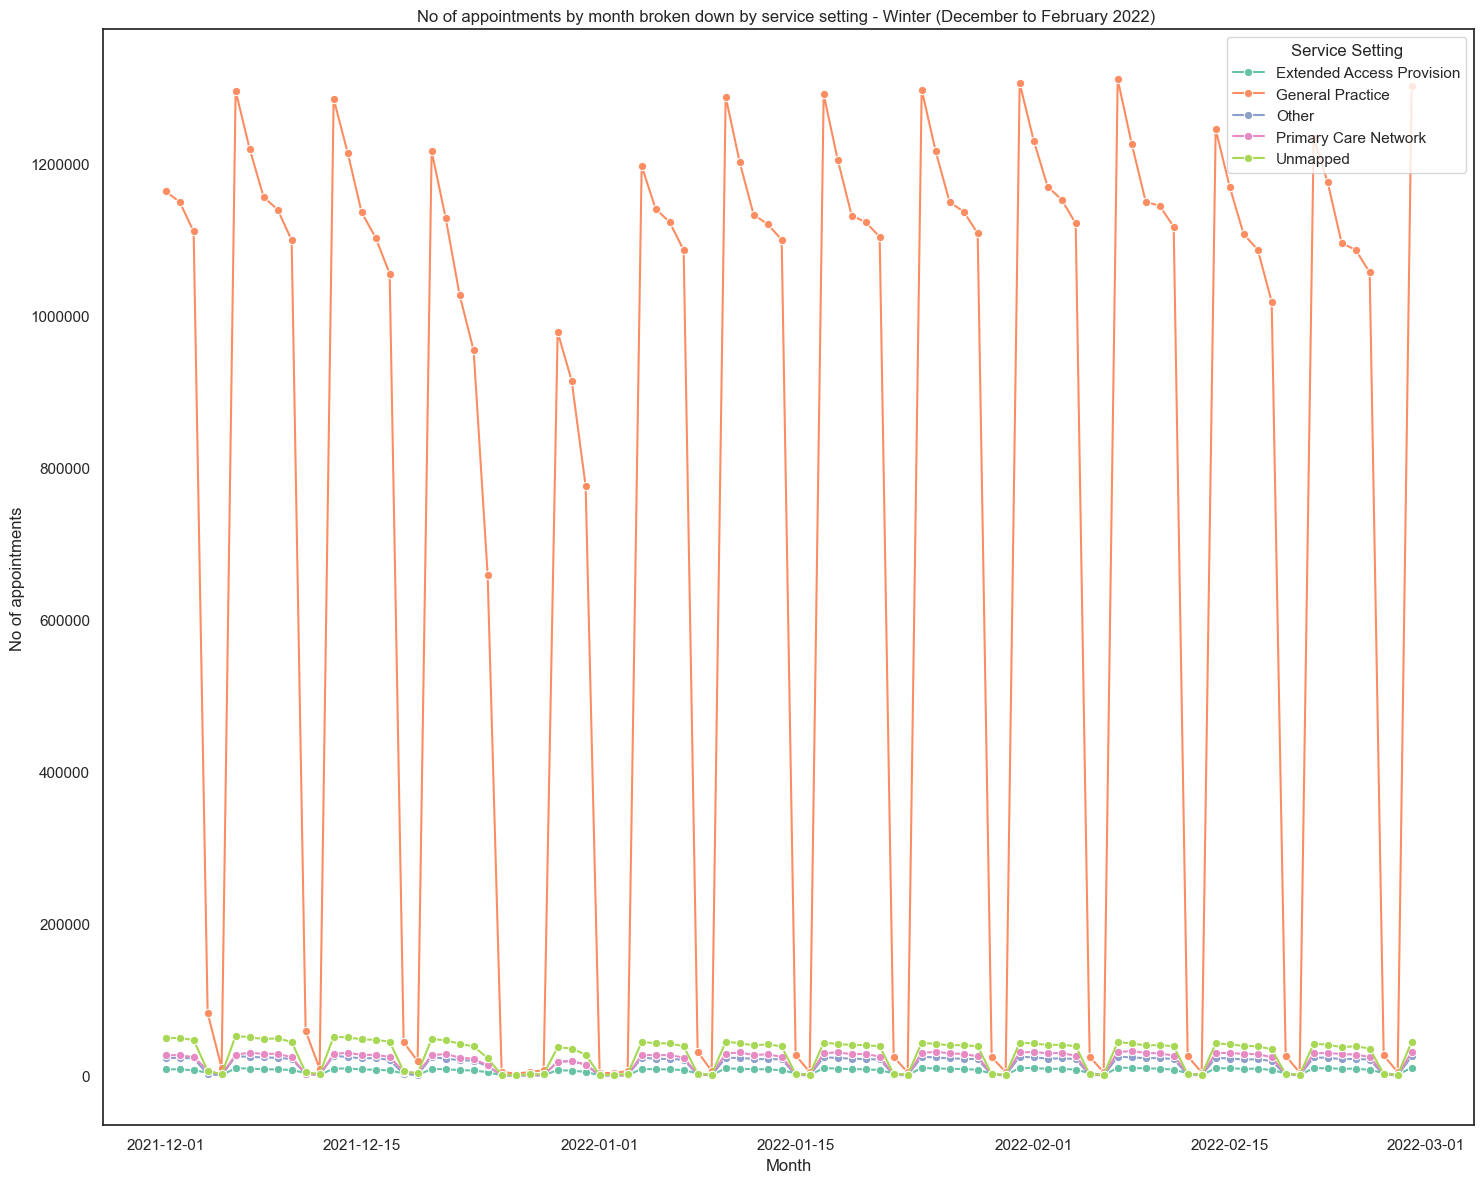

In [86]:
# Look at December to February 2022 in more detail to allow a closer look.

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a lineplot.
ax = sns.lineplot(
    x='appointment_date', 
    y='count_of_appointments', 
    hue='service_setting', 
    marker='o', 
    palette='Set2',
    data=agg_winter21_22)

# Set labels
ax.set_xlabel("Month")
ax.set_ylabel("No of appointments")
ax.set_title("No of appointments by month broken down by service setting - Winter (December to February 2022) ")

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

# Format the legend
ax.legend(title="Service Setting",
          loc='upper right',
          bbox_to_anchor=[1,1])

# Adjust layout to ensure everything fits without overlapping
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("No of appointments by month broken down by service setting - Winter (December to February 2022).png")

**Spring (March to May 2022):**

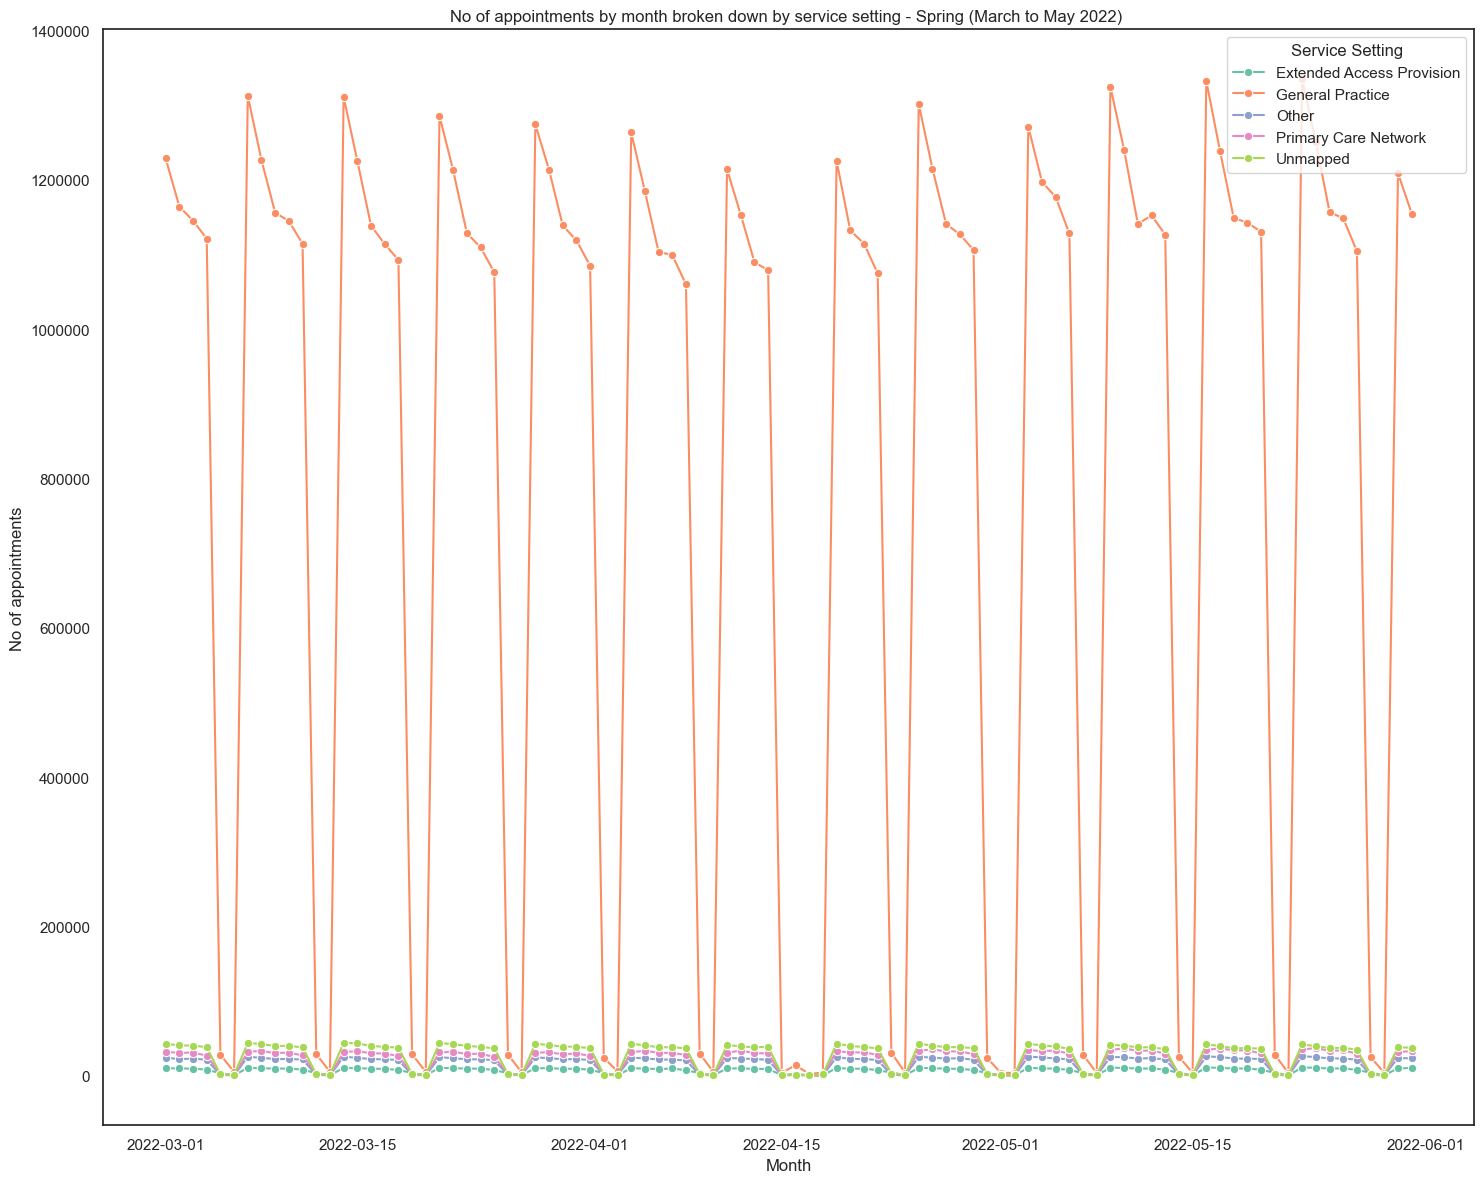

In [88]:
# Look at March to May 2022 in more detail to allow a closer look.

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a lineplot.
ax = sns.lineplot(
    x='appointment_date', 
    y='count_of_appointments', 
    hue='service_setting', 
    marker='o', 
    palette='Set2',
    data=agg_spring22)

# Set labels
ax.set_xlabel("Month")
ax.set_ylabel("No of appointments")
ax.set_title("No of appointments by month broken down by service setting - Spring (March to May 2022) ")


# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

# Format the legend
ax.legend(title="Service Setting",
          loc='upper right',
          bbox_to_anchor=[1,1])

# Adjust layout to ensure everything fits without overlapping
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("No of appointments by month broken down by service setting - Spring (March to May 2022).png")


##### Insights
- In all seasons the no of appointments peak earlier in the week on a monday, and reduce over the week.
- No of appointments are at their lowest levels in the summer, and during holiday periods (Half terms, Christmas and Easter)
- Autumn experiences sees a steady increase in number of appointments leading up to December which should be factored in to resources planning

## Section 4. Is there adequate staff and capacity in the networks?

The next section looks at how appointment per month against:
- Q9) utlisation capacity - Should the NHS start looking at increasing staff levels?
- Q10) hcp type - How do the healthcare professional types differ over time?
- Q11) appointment status - Are there significant changes in whether or not visits are attended?
- Q12) appointment mode - Are there changes in terms of appointment mode and the busiest months?
- Q13) time between booking and appointment - Are there any trends in time between booking and appointment?
- Q14) How do the various service settings compare?

In [92]:
# Find the minimum and maximum dates

min_date = ar['appointment_month'].min()
max_date = ar['appointment_month'].max()

# Print the min and max dates.
print("Minimum Date: ", min_date)
print("Maximum Date: ",max_date)

Minimum Date:  2020-01-01 00:00:00
Maximum Date:  2022-06-01 00:00:00


In [93]:
# Ensure 'appointment_month' is in datetime format for filtering
ar['appointment_month'] = pd.to_datetime(ar['appointment_month'], format='%Y-%m')

# Filter the data to only look at data from 2021-08 onwards
filtered_ar = ar[ar['appointment_month'] >= '2021-08-01']

# 1. Total appointments per month
total_appointments_per_month = filtered_ar.groupby(filtered_ar['appointment_month'].dt.to_period('M'))['count_of_appointments'].sum().reset_index()
total_appointments_per_month['appointment_month'] = total_appointments_per_month['appointment_month'].astype(str)

# 2. HCP type by appointment month
hcp_type_by_month = filtered_ar.groupby([filtered_ar['appointment_month'].dt.to_period('M'), 'hcp_type'])['count_of_appointments'].sum().reset_index()
hcp_type_by_month['appointment_month'] = hcp_type_by_month['appointment_month'].astype(str)

# 3. Appointment status by appointment month
appointment_status_by_month = filtered_ar.groupby([filtered_ar['appointment_month'].dt.to_period('M'), 'appointment_status'])['count_of_appointments'].sum().reset_index()
appointment_status_by_month['appointment_month'] = appointment_status_by_month['appointment_month'].astype(str)

# 4. Appointment mode by appointment month
appointment_mode_by_month = filtered_ar.groupby([filtered_ar['appointment_month'].dt.to_period('M'), 'appointment_mode'])['count_of_appointments'].sum().reset_index()
appointment_mode_by_month['appointment_month'] = appointment_mode_by_month['appointment_month'].astype(str)

# 5. Time between book and appointment by appointment month
time_between_by_month = filtered_ar.groupby([filtered_ar['appointment_month'].dt.to_period('M'), 'time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()
time_between_by_month['appointment_month'] = time_between_by_month['appointment_month'].astype(str)

# View the DataFrames
print("Total Appointments per Month:")
print(total_appointments_per_month)

print("\nHCP Type by Appointment Month:")
print(hcp_type_by_month)

print("\nAppointment Status by Appointment Month:")
print(appointment_status_by_month)

print("\nAppointment Mode by Appointment Month:")
print(appointment_mode_by_month)

print("\nTime between book and appointment by Appointment Month:")
print(time_between_by_month)

Total Appointments per Month:
   appointment_month  count_of_appointments
0            2021-08               23852171
1            2021-09               28522501
2            2021-10               30303834
3            2021-11               30405070
4            2021-12               25140776
5            2022-01               25635474
6            2022-02               25355260
7            2022-03               29595038
8            2022-04               23913060
9            2022-05               27495508
10           2022-06               25828078

HCP Type by Appointment Month:
   appointment_month              hcp_type  count_of_appointments
0            2021-08                    GP               12299022
1            2021-08  Other Practice staff               10797821
2            2021-08               Unknown                 755328
3            2021-09                    GP               14487785
4            2021-09  Other Practice staff               13126731
5            2

**Question 9:** Should the NHS start looking at increasing staff levels? 

In [95]:
# Determine the total number of appointments per month and the daily average against NHS capacity

# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.
total_appointments_per_month['Utilisation'] = total_appointments_per_month['count_of_appointments'] / 30 

# Round the Utilisation column to one decimal place
total_appointments_per_month['Utilisation'] = total_appointments_per_month['Utilisation'].round(1)

# Add a % of maximum capacity column - NHS has provided a figure of an average of 1,200,000 appointments per day
total_appointments_per_month['Max Capacity %'] = total_appointments_per_month['Utilisation'] / 1200000 

# Convert maximum capacity column to % and round to one decimal place
total_appointments_per_month['Max Capacity %'] = (total_appointments_per_month['Max Capacity %'] * 100).round(1)

# View the DataFrame.
total_appointments_per_month

,appointment_month,count_of_appointments,Utilisation,Max Capacity %
0,2021-08,23852171,795072,66
1,2021-09,28522501,950750,79
2,2021-10,30303834,1010128,84
3,2021-11,30405070,1013502,84
4,2021-12,25140776,838026,70
5,2022-01,25635474,854516,71
6,2022-02,25355260,845175,70
7,2022-03,29595038,986501,82
8,2022-04,23913060,797102,66
9,2022-05,27495508,916517,76


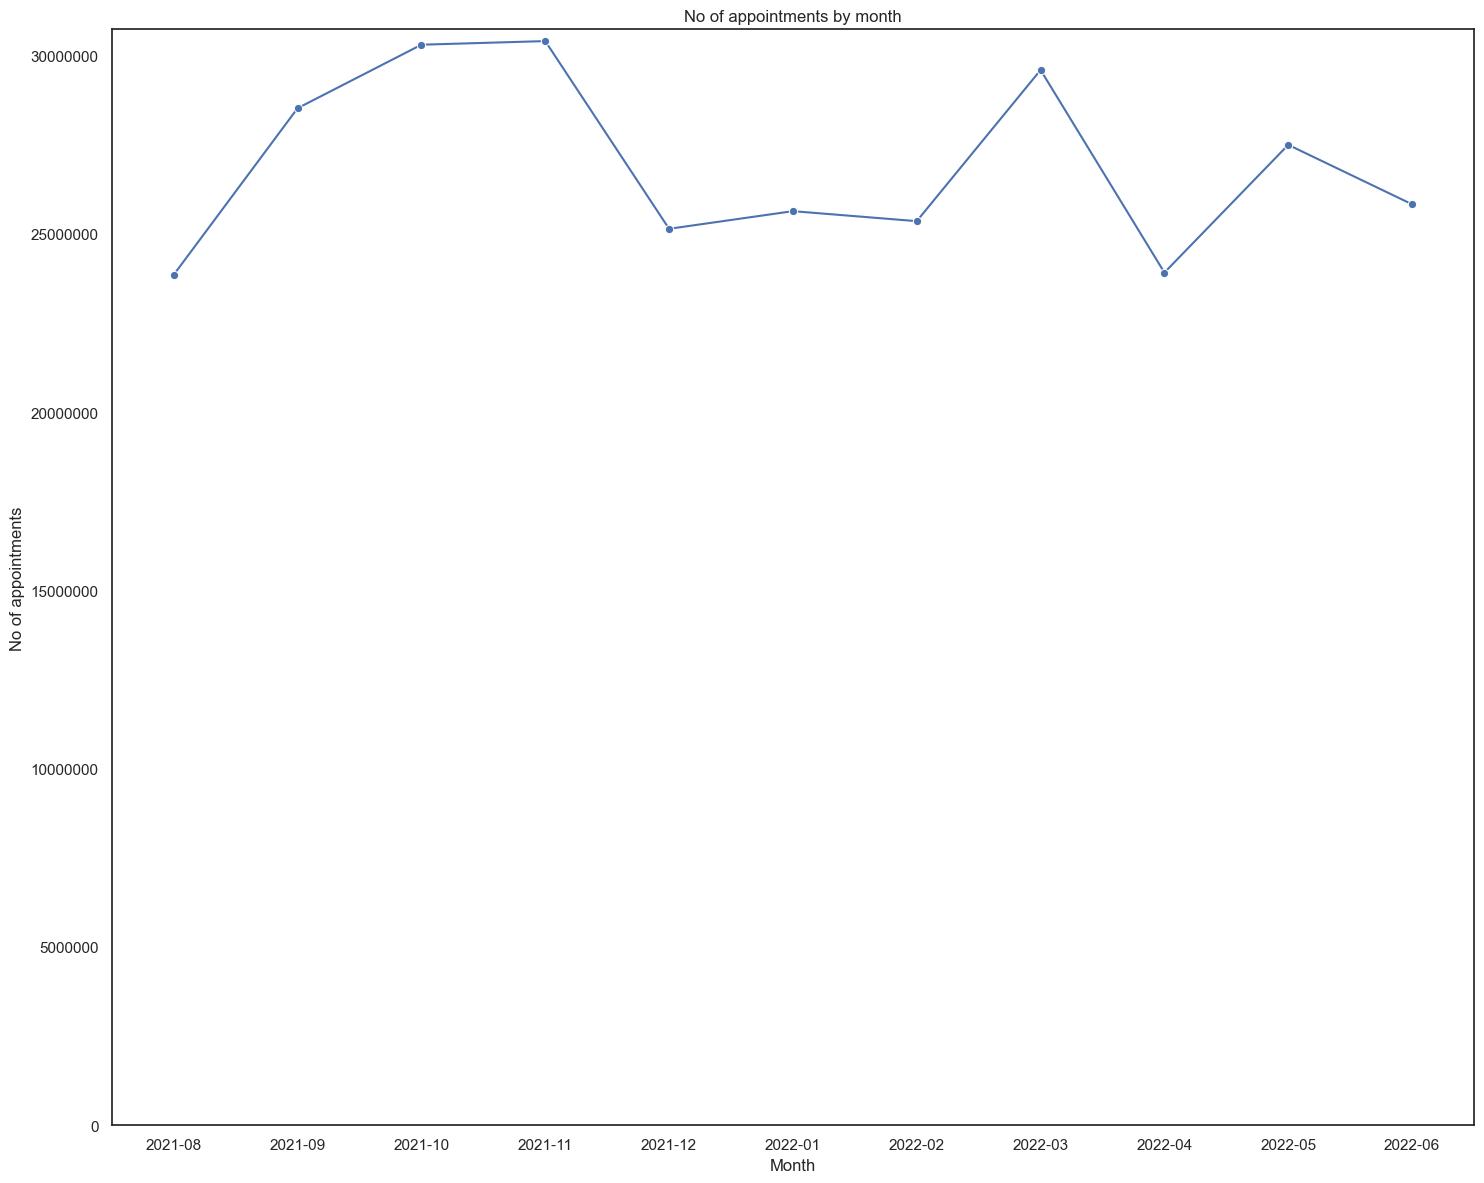

In [96]:
# Plot sum of count of monthly visits.

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')
    
# Create a lineplot with Seaborn.

ax = sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments',
    marker='o',
    data=total_appointments_per_month)

# Set the y-axis limit to start at 0
plt.ylim(bottom=0)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

# Set labels
ax.set_xlabel("Month")
ax.set_ylabel("No of appointments")
ax.set_title("No of appointments by month")

# Adjust layout to ensure everything fits without overlapping
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("No of appointments by month.png")


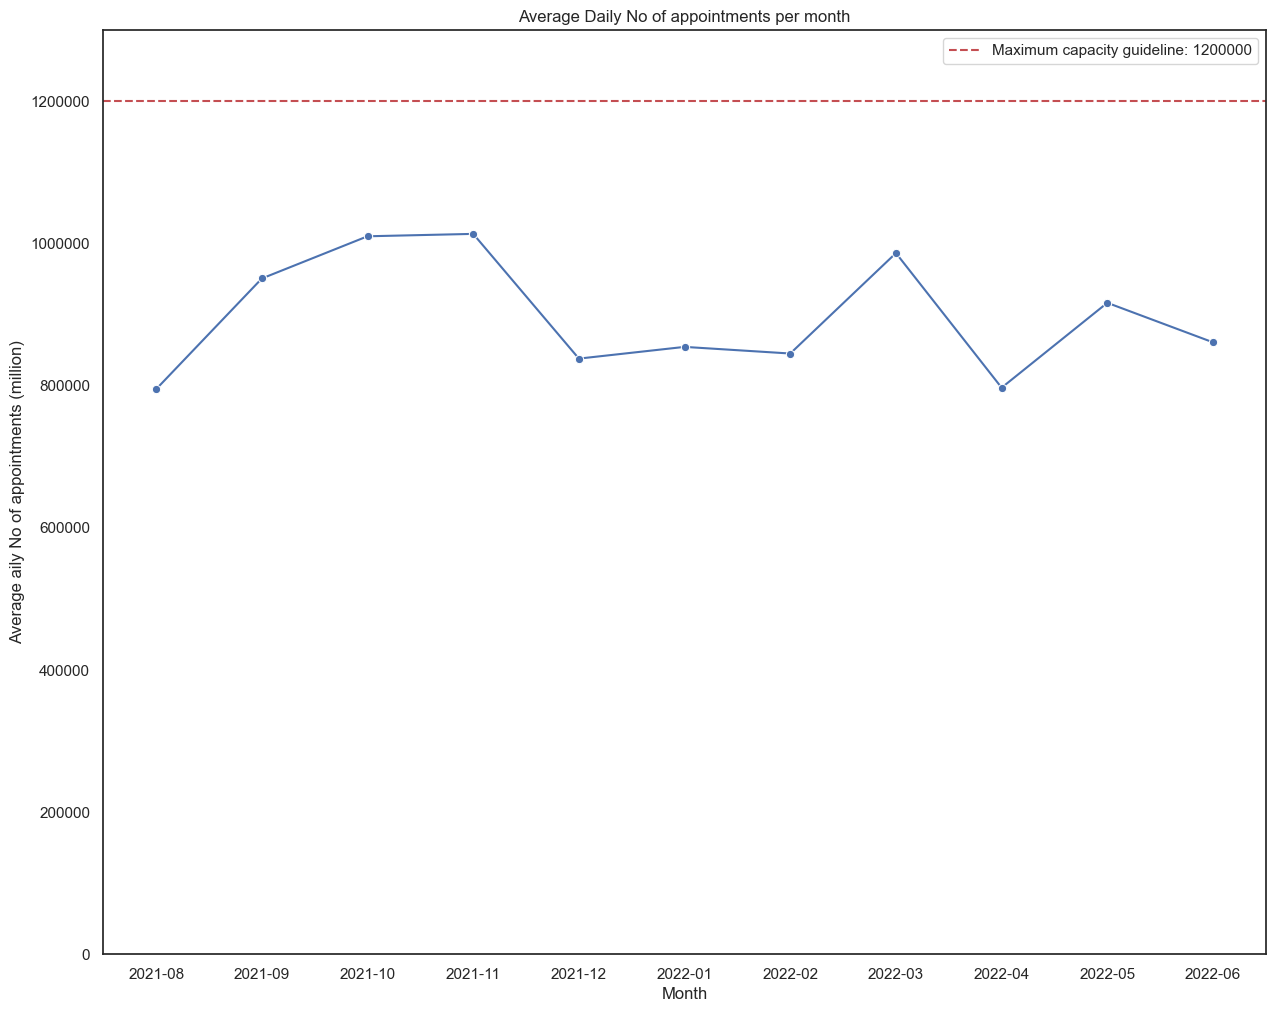

In [97]:
# Plot monthly capacity utilisation.

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')
    
# Create a lineplot with Seaborn.

ax = sns.lineplot(
    x='appointment_month', 
    y='Utilisation',
    marker='o',
    data=total_appointments_per_month)

# Set the y-axis limit to start at 0
ax.set_ylim(0, 1300000)

# Add a target line
target_value = 1200000
plt.axhline(y=target_value, color='r', linestyle='--', label=f'Maximum capacity guideline: {target_value}')

# Set labels
ax.set_xlabel("Month")
ax.set_ylabel("Average aily No of appointments (million)")
ax.set_title("Average Daily No of appointments per month")

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

# Add legend
ax.legend()

# Save the plot as a PNG file
plt.savefig("Average Daily No of appointments per month.png")

# Show the plot
plt.show()

#####  Insights and recommendations
- The NHS maximum capacity guideline is not breached at any point when looking at the daily average 
- Therefore this would suggest that capacity it not an issue when looking at the total number of appointments by month
- However at peak months this is at 85% average capacity, which suggests there room to absorb increases in appointments, however these peak mo should be monitored closely.  
- This analysis looks at the average utliisation across the whole network. Further analysis could focus on the peak times in particular locations to see if the capacity problems are more localised. Does the NHS have a suggested daily capacity per location?  

**Question 10:** How do the healthcare professional types differ over time?

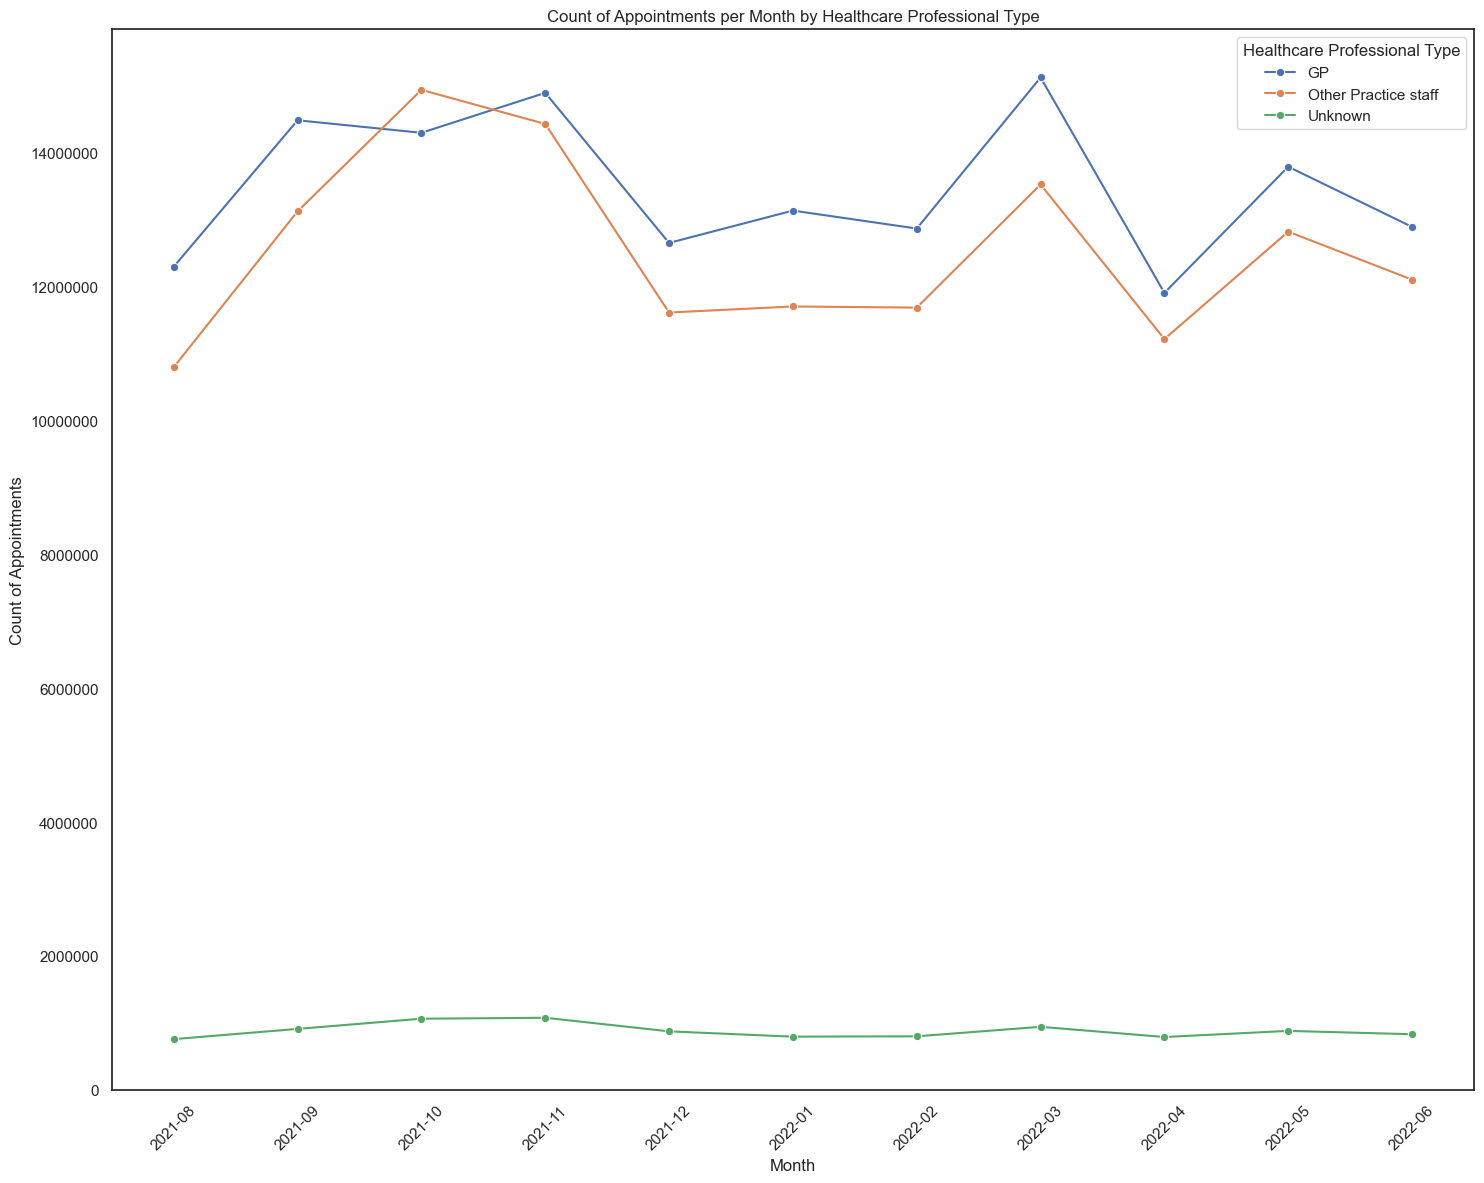

In [100]:
# Line plot to show how healthcare professionals types differ over time

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a lineplot with Seaborn
ax = sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments',
    hue='hcp_type',
    marker='o',
    errorbar=None,
    data=hcp_type_by_month
)

# Set the y-axis limit to start at 0
ax.set_ylim(bottom=0)

# Set labels
ax.set_xlabel("Month")
ax.set_ylabel("Count of Appointments")
ax.set_title("Count of Appointments per Month by Healthcare Professional Type")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

# Add legend with title
plt.legend(title='Healthcare Professional Type')

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("Count of Appointments per Month by Healthcare Professional Type.png")

# Show the plot
plt.show()

**Question 11:** Are there significant changes in whether or not visits are attended?

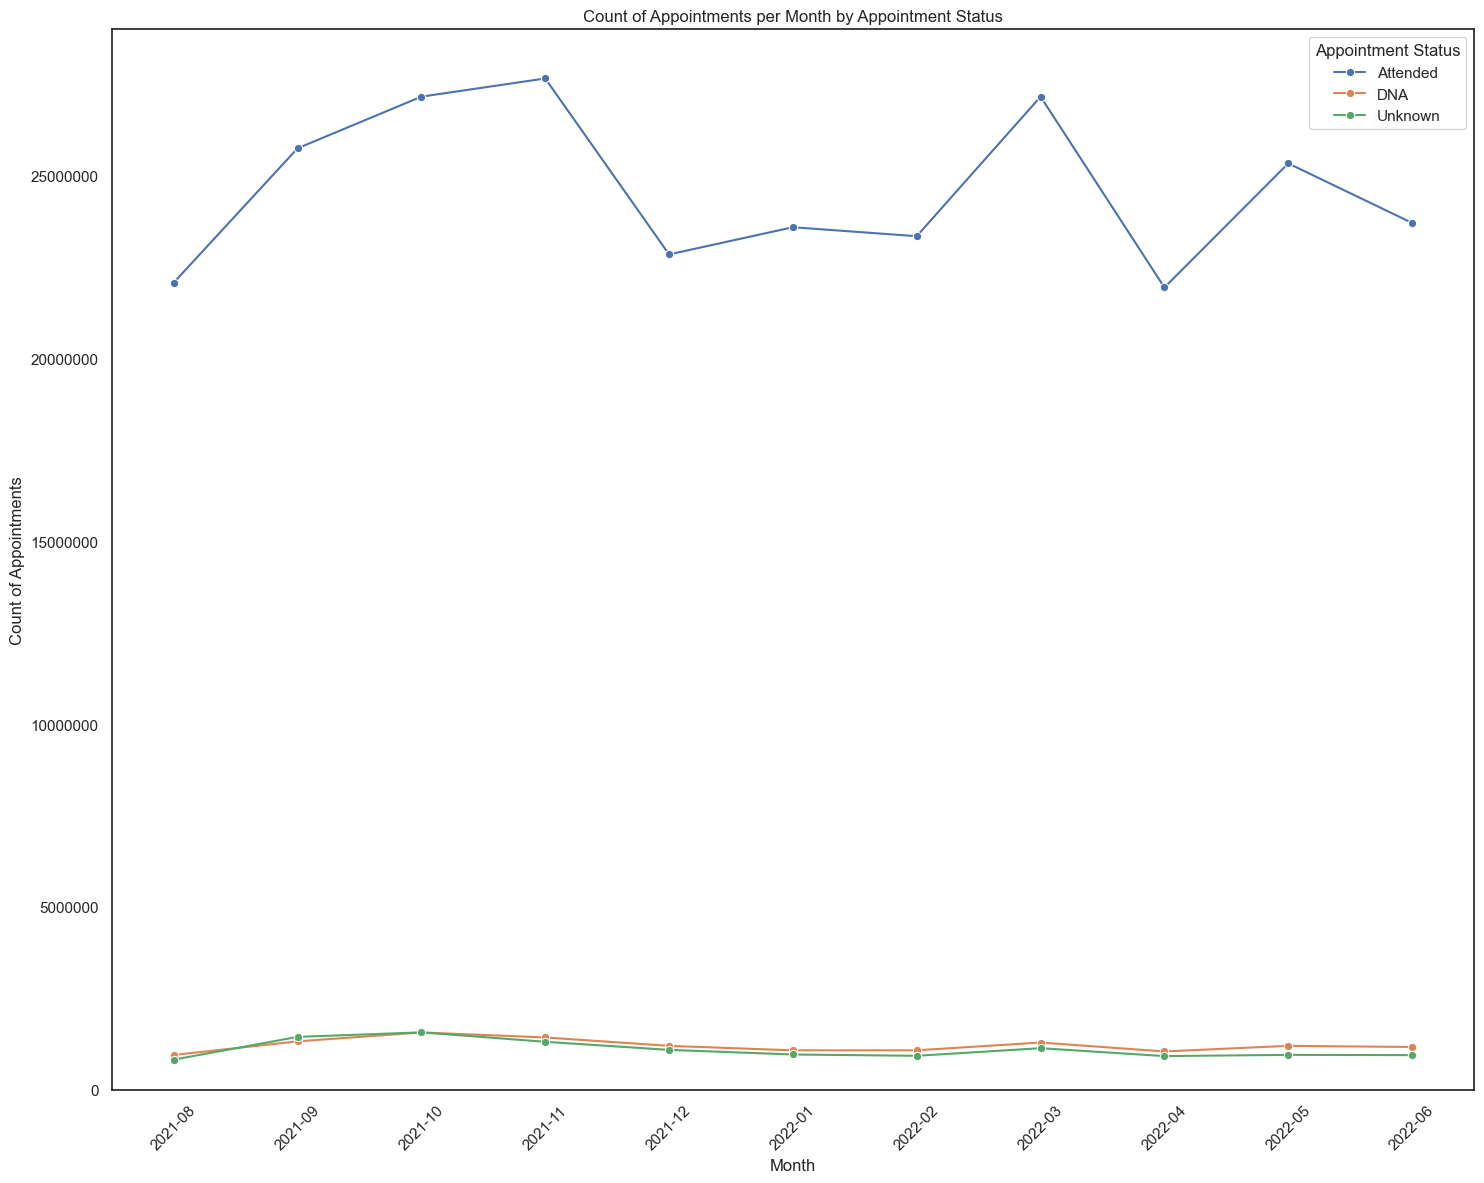

In [102]:
# Create a line plot to answer the question.

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a lineplot with Seaborn
ax = sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments',
    hue='appointment_status',
    marker='o',
    errorbar=None,
    data=appointment_status_by_month
)

# Set the y-axis limit to start at 0
ax.set_ylim(bottom=0)

# Set labels
ax.set_xlabel("Month")
ax.set_ylabel("Count of Appointments")
ax.set_title("Count of Appointments per Month by Appointment Status")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

# Add legend with title
plt.legend(title='Appointment Status')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

##### Insights and recommendations
- The a very high propostion of total appointments are attended
- Further analysis included in this report will look at the 'Did not Attend' results more closely

**Question 12:** Are there changes in terms of appointment mode and the busiest months?

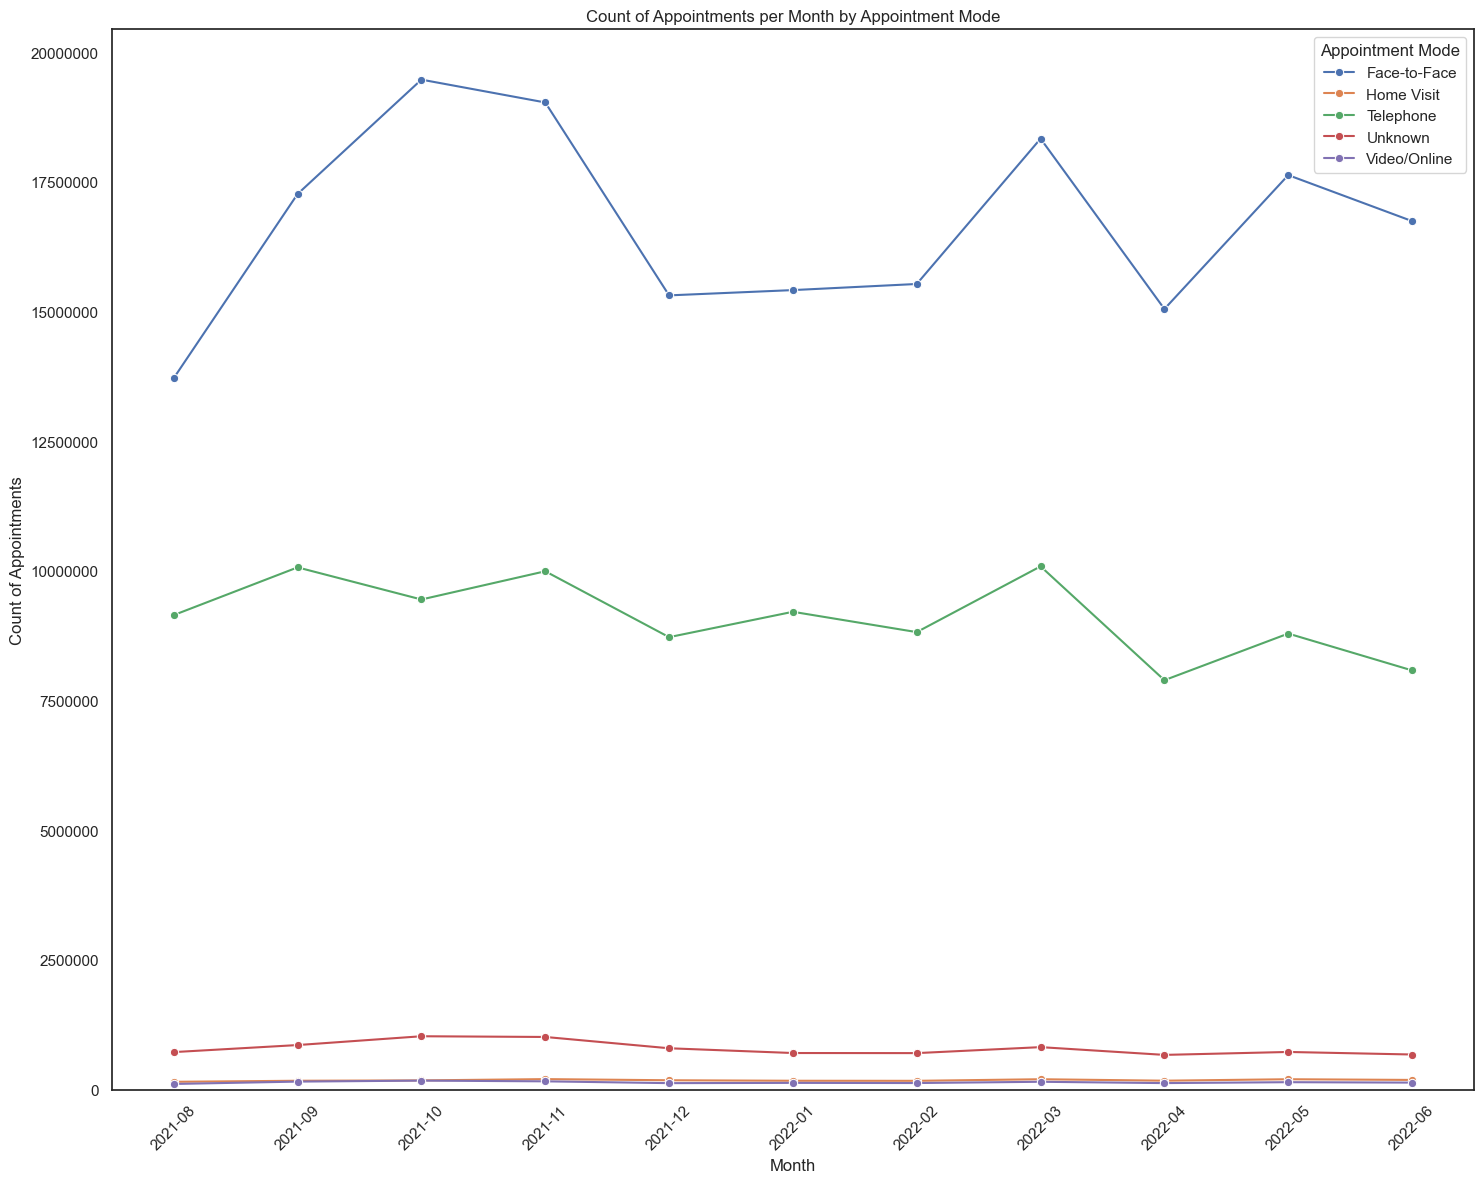

In [105]:
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a lineplot with Seaborn
ax = sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments',
    hue='appointment_mode',
    marker='o',
    errorbar=None,
    data=appointment_mode_by_month
)

# Set the y-axis limit to start at 0
ax.set_ylim(bottom=0)

# Set labels
ax.set_xlabel("Month")
ax.set_ylabel("Count of Appointments")
ax.set_title("Count of Appointments per Month by Appointment Mode")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend with title
plt.legend(title='Appointment Mode')

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("Count of Appointments per Month by Appointment Mode.png")

# Show the plot
plt.show()

##### Insights and recommendations
- Face to face appointments make up the bulk of appointments, following by telephone appointments
- Very few appointment are conducted by Video / Online which is something the NHS could consider to increase 

**Question 13:** Are there any trends in time between booking and appointment?

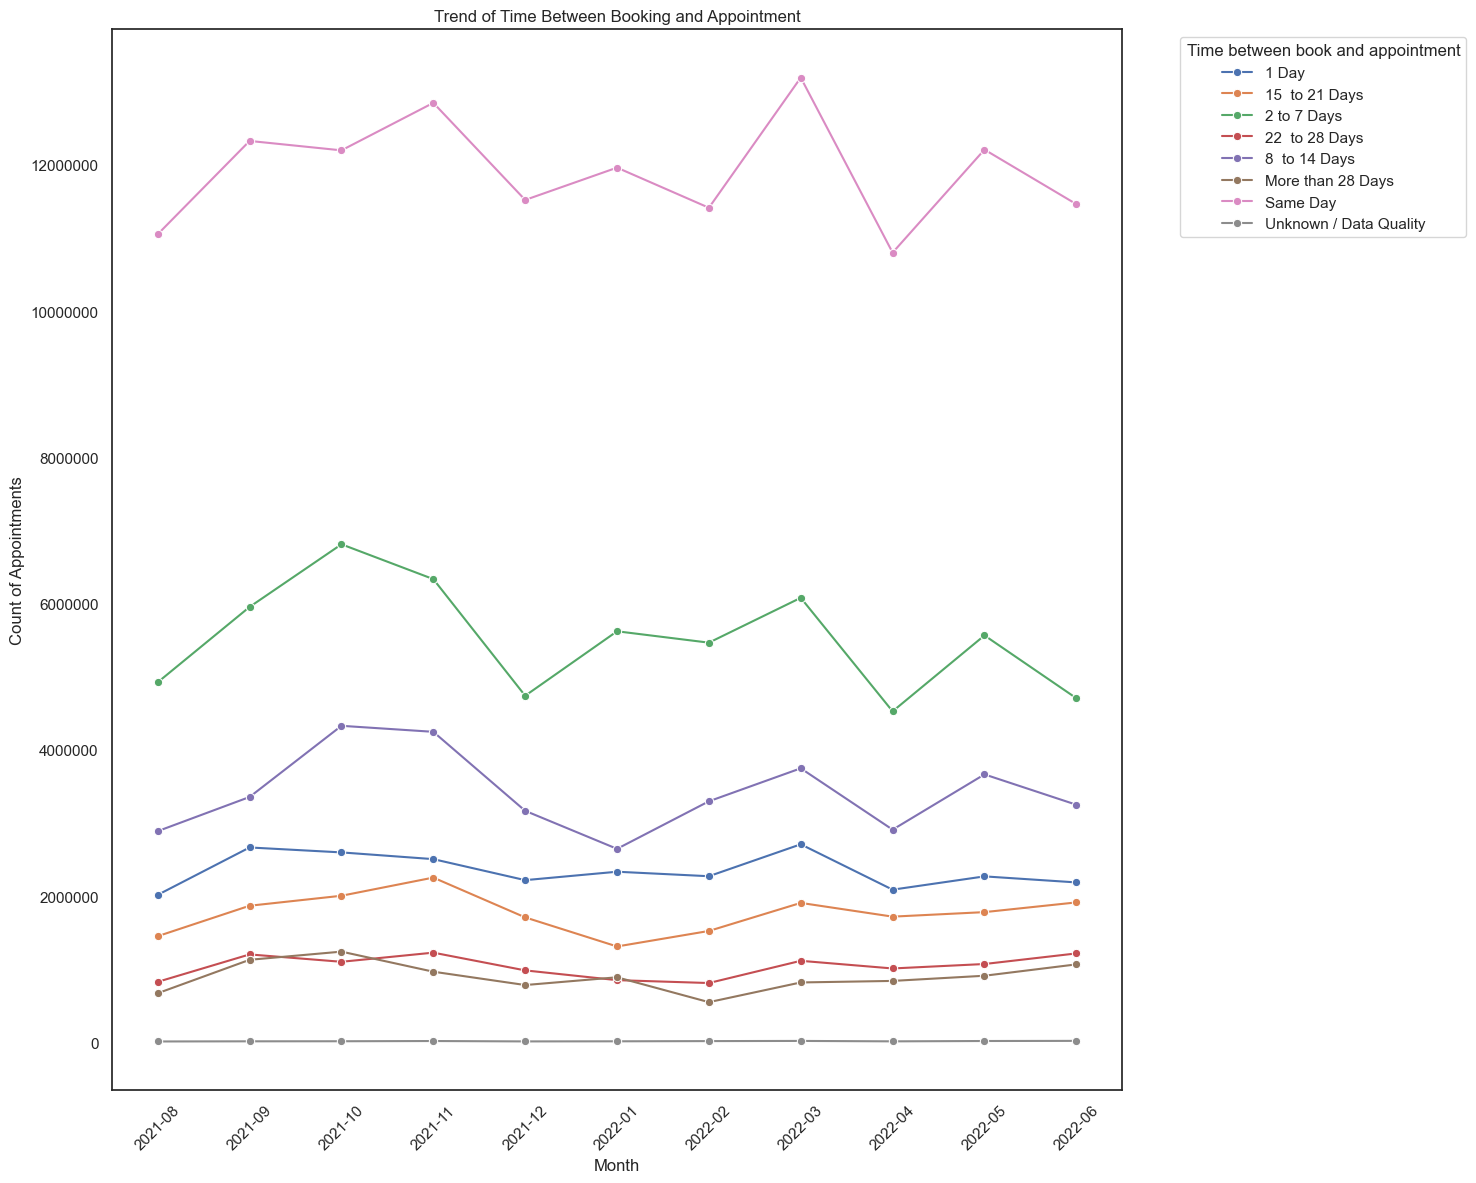

In [108]:
# Create a line plot to answer the question.

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a lineplot with Seaborn
ax = sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments',
    hue='time_between_book_and_appointment',
    marker='o',
    errorbar=None, 
    data=time_between_by_month
)

# Set labels
ax.set_xlabel("Month")
ax.set_ylabel("Count of Appointments")
ax.set_title("Trend of Time Between Booking and Appointment")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format the legend
ax.legend(title="Time between book and appointment",
          bbox_to_anchor=[1.05,1])

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("Trend of Time Between Booking and Appointment.png")

# Show the plot
plt.show()

##### Insight
- Same day appointments account for the most number of appointments
- 2 to 7 day and 8 to 14 days are more frequent waiting times than next day appointments. Should facilating more next day appointments be considered?


**Question 14** How do the various service settings compare?

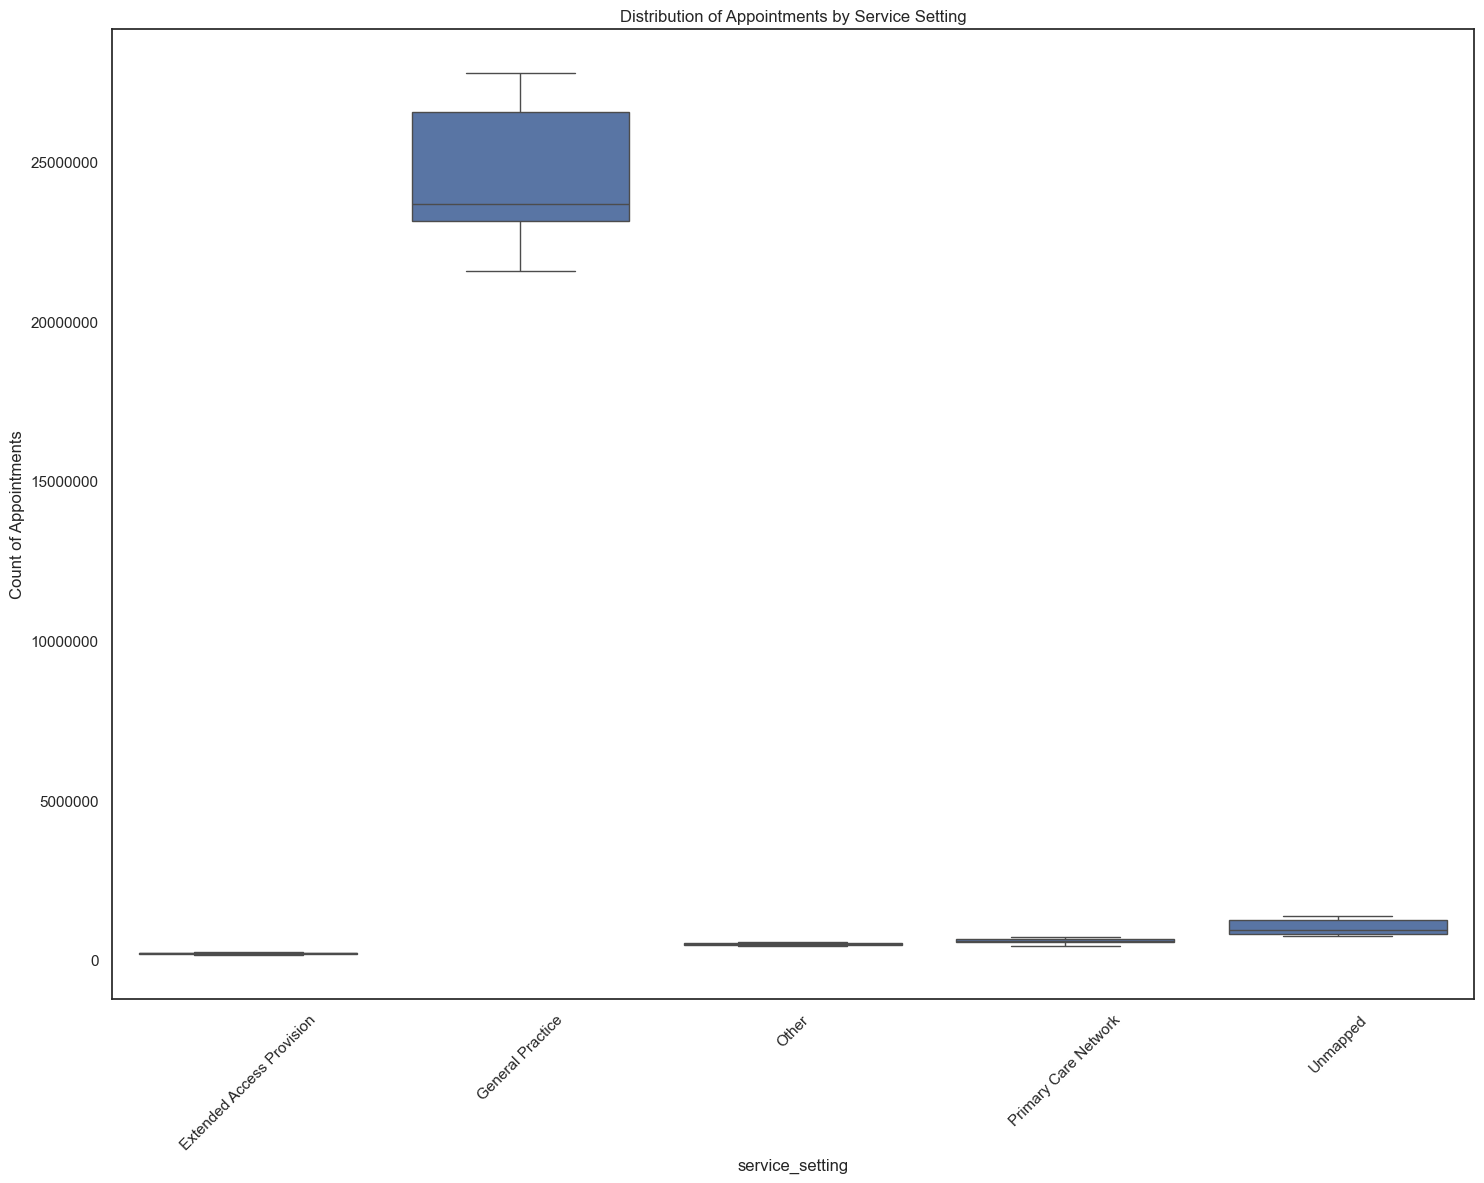

In [111]:
# Create a boxplot in Seaborn based on the new DataFrame to indicate the service settings for the number of appointments.

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a boxplot with Seaborn
ax = sns.boxplot(
    x='service_setting', 
    y='count_of_appointments',
    data=agg_by_service_setting
)

# Set labels
ax.set_xlabel("service_setting")
ax.set_ylabel("Count of Appointments")
ax.set_title("Distribution of Appointments by Service Setting")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("Distribution of Appointments by Service Setting.png")

# Show the plot
plt.show()

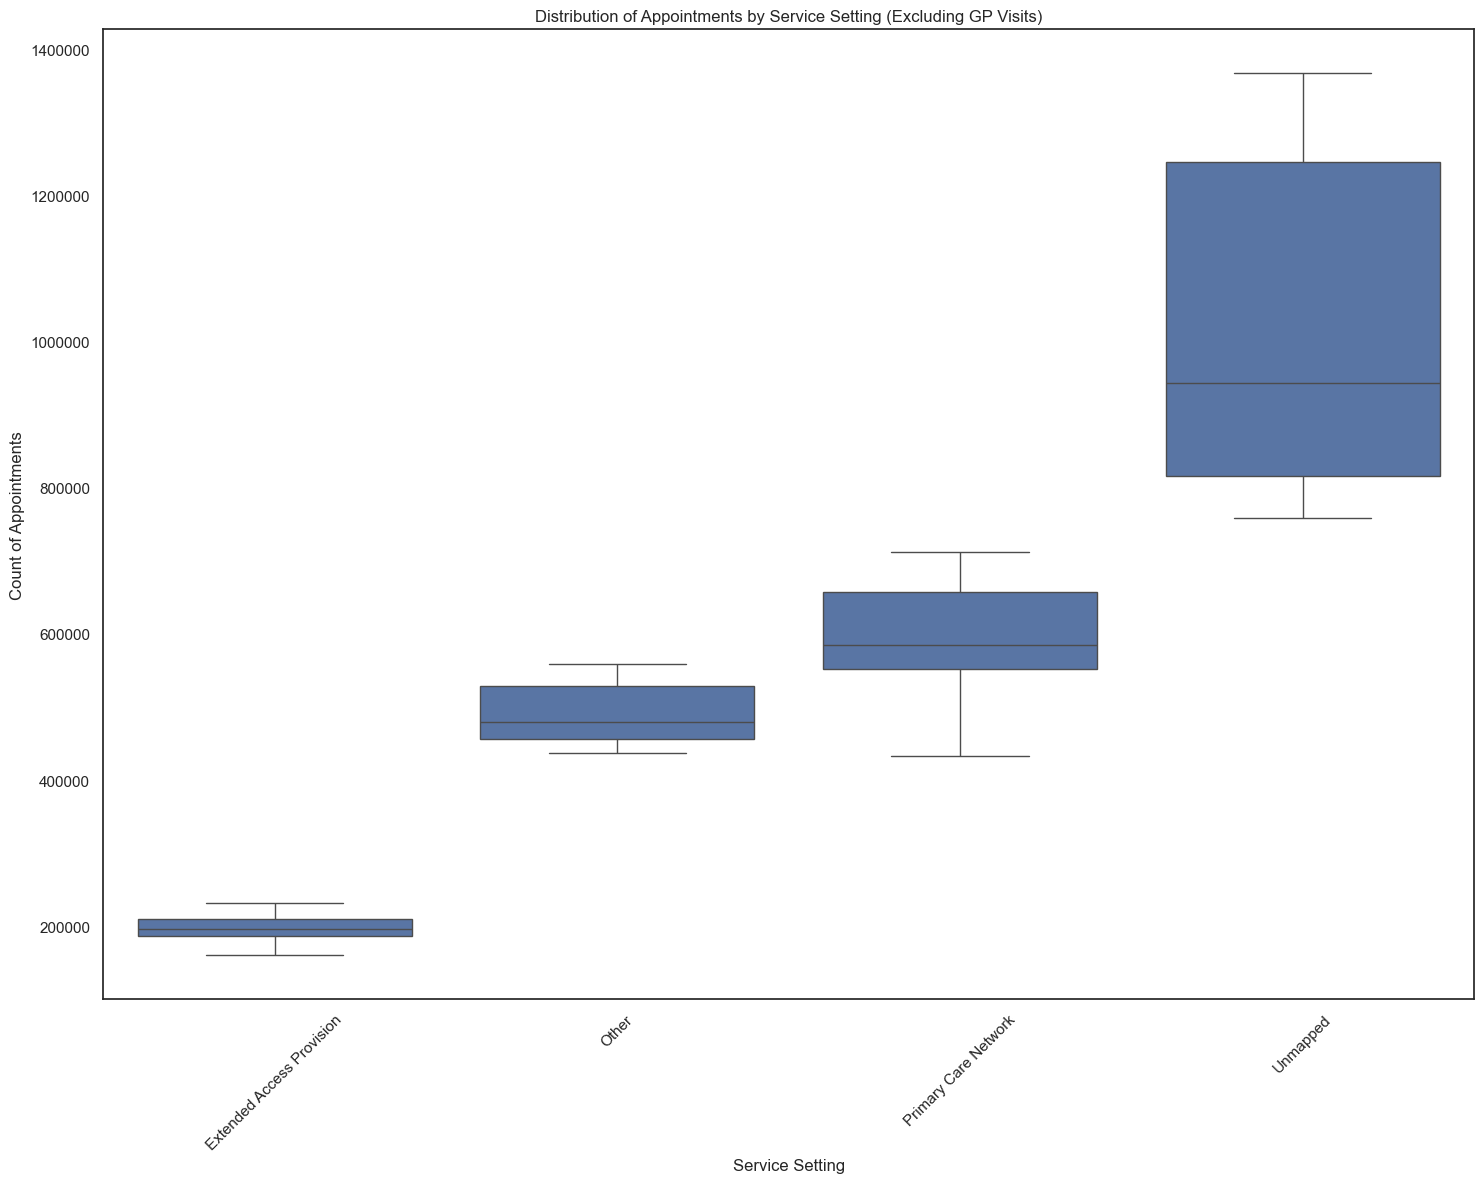

In [112]:
# Create a boxplot in Seaborn where you concentrate on all the service settings, excluding GP visits.

# Filter out GP visits
filtered_nc = agg_by_service_setting[agg_by_service_setting['service_setting'] != 'General Practice']

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a boxplot with Seaborn
ax = sns.boxplot(
    x='service_setting', 
    y='count_of_appointments',
    data=filtered_nc
)

# Set labels
ax.set_xlabel("Service Setting")
ax.set_ylabel("Count of Appointments")
ax.set_title("Distribution of Appointments by Service Setting (Excluding GP Visits)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("Distribution of Appointments by Service Setting (Excluding GP Visits).png")

# Show the plot
plt.show()

##### Insights
- General Practice service setting accounts the majority share of total appointments with an Interquartile Range between 23 - 27m appointments per month 
- The number of unmapped service settings is the next largest category, which could suggest investing in improving data management practices

## Section 5. The problem of missed appointments

### The next section looks the following questions

- Q15: How does the trend of missed appointments vary over time?
- Q16: How does the trend of missed appointments vary by appointment mode?
- Q17: How does the trend of missed appointments vary by average waiting for appointment?

In [116]:
# Create four separate DataFrames, each aggregating the count of missed appointments by a different feature:

# Filter the data set to only look at data from 2021-08 onwards.
filtered_ar = ar[ar['appointment_month'] >= '2021-08']

# Filter the DataFrame for appointments with status 'DNA'
ar_missed_app = filtered_ar[filtered_ar['appointment_status'] == 'DNA']

# Ensure 'appointment_month' is in datetime format
ar_missed_app['appointment_month'] = pd.to_datetime(ar_missed_app['appointment_month'], format='%Y-%m')

# Group by each feature separately and sum the count of appointments

# Aggregated by appointment_month
agg_by_month = ar_missed_app.groupby(ar_missed_app['appointment_month'].dt.to_period('M'))['count_of_appointments']\
                    .sum().reset_index()
agg_by_month['appointment_month'] = agg_by_month['appointment_month'].astype(str)

# Aggregated by hcp_type and appointment_month
agg_by_hcp_type = ar_missed_app.groupby([ar_missed_app['appointment_month'].dt.to_period('M'), 'hcp_type'])['count_of_appointments']\
                    .sum().reset_index()
agg_by_hcp_type['appointment_month'] = agg_by_hcp_type['appointment_month'].astype(str)

# Aggregated by appointment_mode and appointment_month
agg_by_appointment_mode = ar_missed_app.groupby([ar_missed_app['appointment_month'].dt.to_period('M'), 'appointment_mode'])['count_of_appointments']\
                    .sum().reset_index()
agg_by_appointment_mode['appointment_month'] = agg_by_appointment_mode['appointment_month'].astype(str)

# Aggregated by time_between_book_and_appointment and appointment_month
agg_by_time_between = ar_missed_app.groupby([ar_missed_app['appointment_month'].dt.to_period('M'), 'time_between_book_and_appointment'])['count_of_appointments']\
                    .sum().reset_index()
agg_by_time_between['appointment_month'] = agg_by_time_between['appointment_month'].astype(str)

# View the DataFrames
print("Aggregated by month:")
print(agg_by_month)
print("Aggregated by month and hcp_type:")
print(agg_by_hcp_type)
print("\nAggregated by month and appointment_mode:")
print(agg_by_appointment_mode)
print("\nAggregated by month and time_between_book_and_appointment:")
print(agg_by_time_between)

Aggregated by month:
   appointment_month  count_of_appointments
0            2021-08                 949137
1            2021-09                1321348
2            2021-10                1565624
3            2021-11                1428087
4            2021-12                1198866
5            2022-01                1076013
6            2022-02                1076658
7            2022-03                1289888
8            2022-04                1045455
9            2022-05                1199518
10           2022-06                1167790
Aggregated by month and hcp_type:
   appointment_month              hcp_type  count_of_appointments
0            2021-08                    GP                 272890
1            2021-08  Other Practice staff                 655689
2            2021-08               Unknown                  20558
3            2021-09                    GP                 393477
4            2021-09  Other Practice staff                 902812
5            2021-09 

**Question 15** How does the trend of missed appointments vary over time?

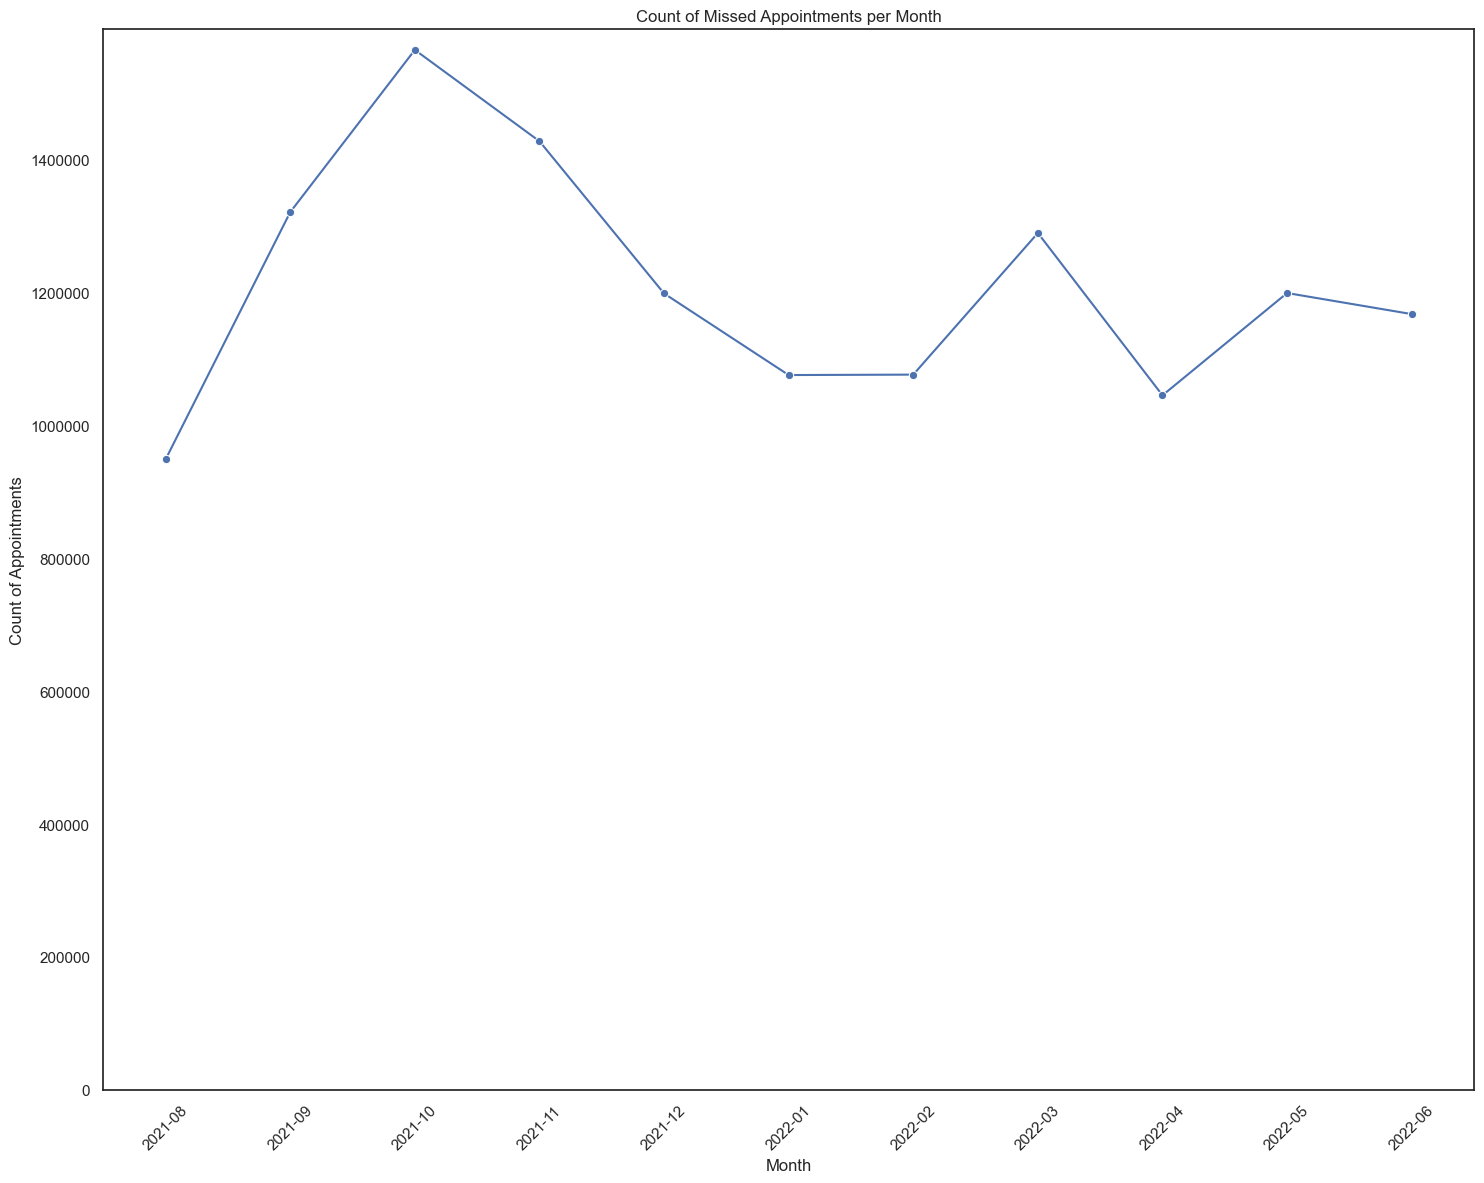

In [118]:
# Plot the number of missed appointments per month

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a lineplot with Seaborn
ax = sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments',
    marker='o',
    errorbar=None,
    data=agg_by_month
)

# Set the y-axis limit to start at 0
ax.set_ylim(bottom=0)

# Set labels
ax.set_xlabel("Month")
ax.set_ylabel("Count of Appointments")
ax.set_title("Count of Missed Appointments per Month")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("Count of Missed Appointments per Month.png")

# Show the plot
plt.show()

##### Insights and recommendations
- More appointments are missed in Autumn / Winter months than in spring / summer months. This follows the pattern of total number of appointments. 
- Further analysis could look into how the time of year and weather conditions affects missed appointments, and whether this should change the number of appointment modes offered during these months

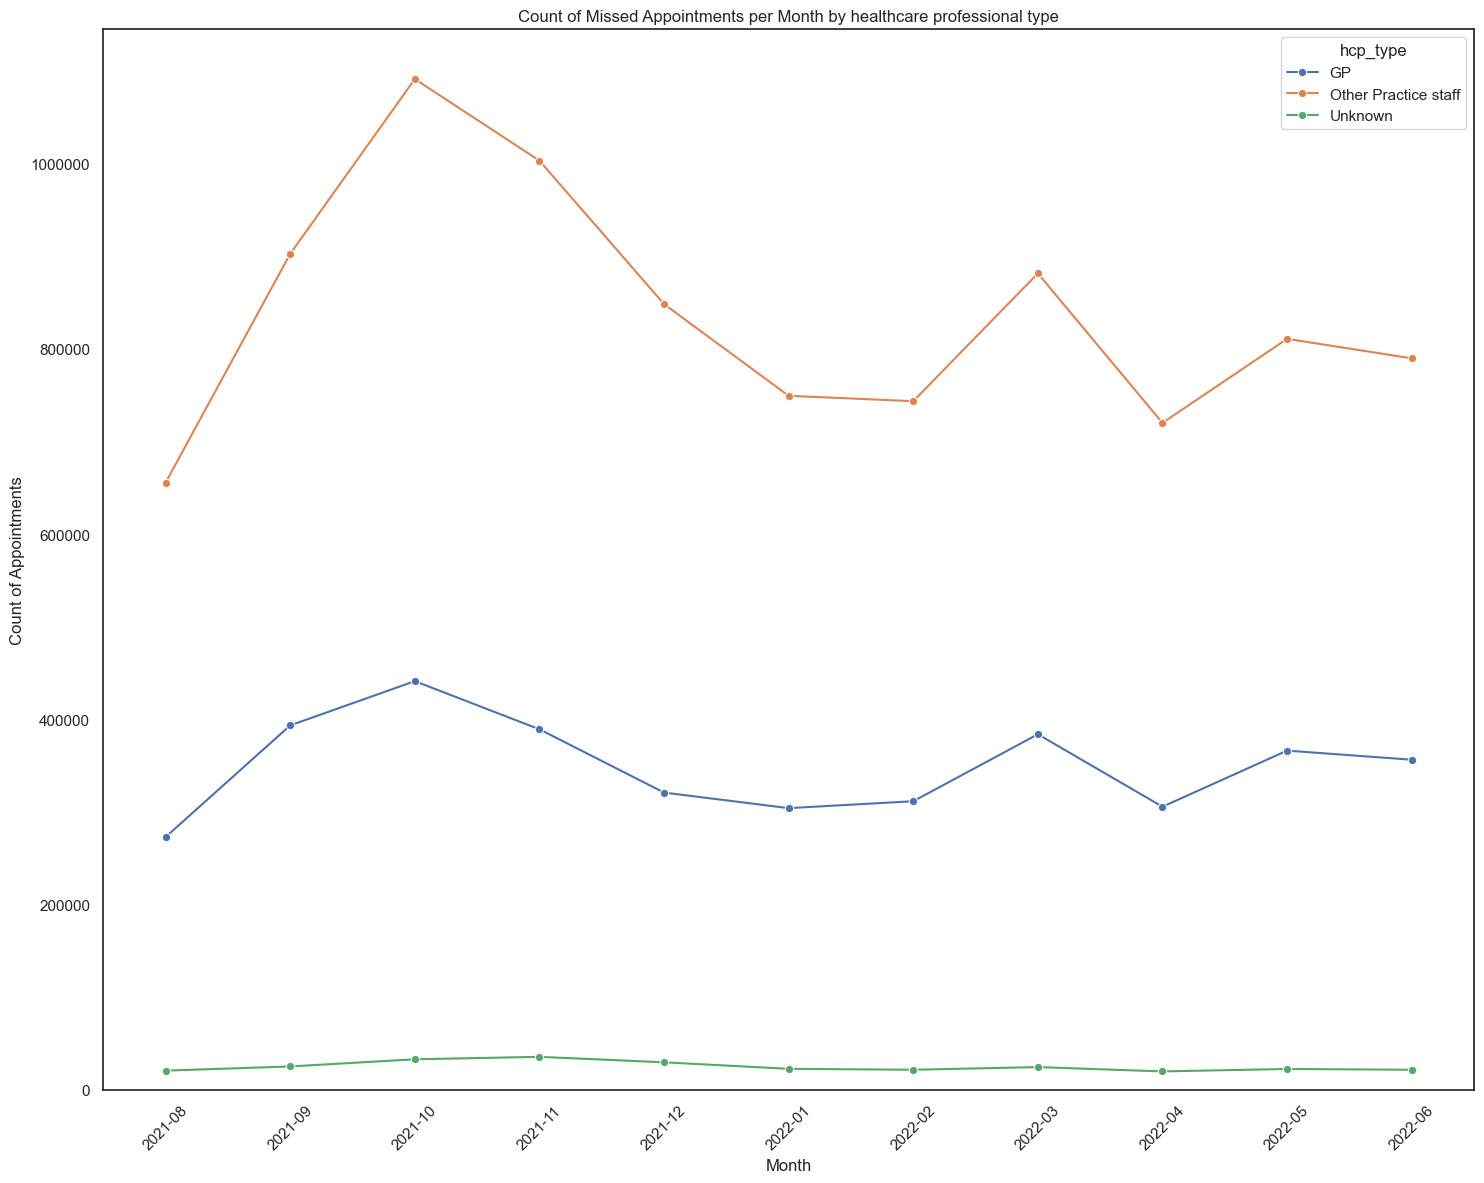

In [120]:
# Plot the relationship between missed appointments and hcy type

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a lineplot with Seaborn
ax = sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments',
    hue='hcp_type',
    marker='o',
    errorbar=None,
    data=agg_by_hcp_type
)

# Set the y-axis limit to start at 0
ax.set_ylim(bottom=0)

# Set labels
ax.set_xlabel("Month")
ax.set_ylabel("Count of Appointments")
ax.set_title("Count of Missed Appointments per Month by healthcare professional type")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("Count of Missed Appointments per Month by healthcare professional type.png")

# Show the plot
plt.show()

**Question 16** How does the trend of missed appointments vary by appointment mode?

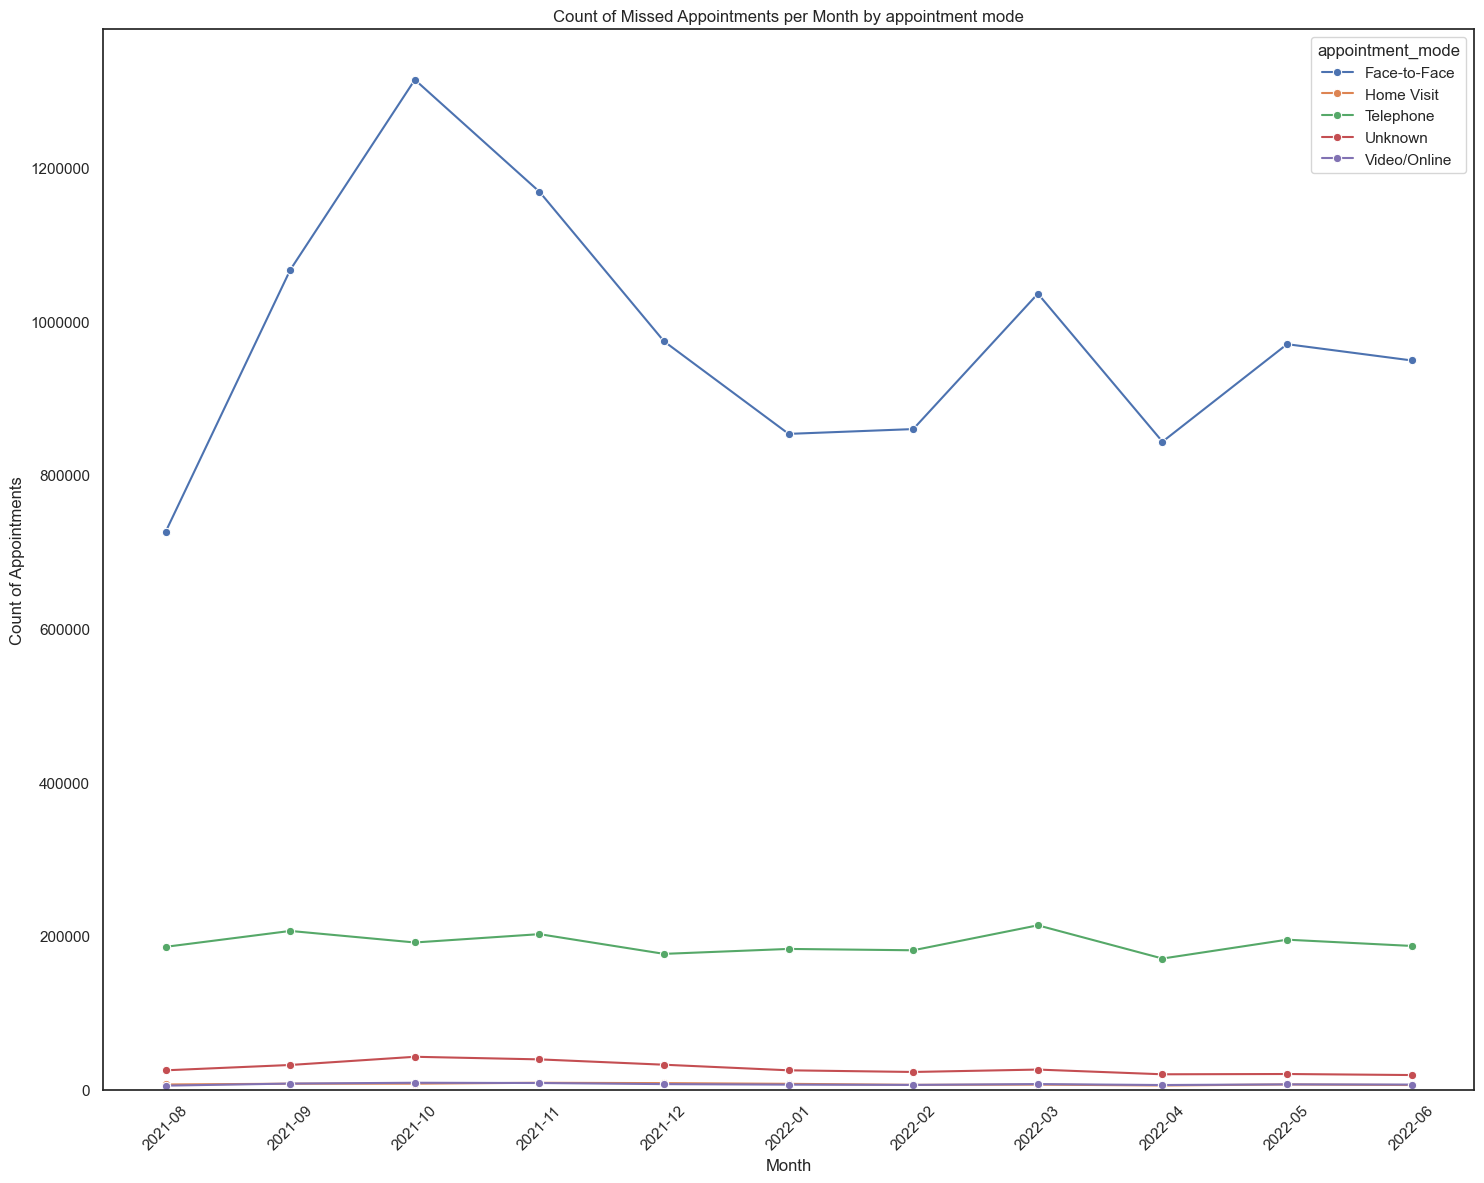

In [122]:
# Plot the relationship between missed appointments and appointment mode

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a lineplot with Seaborn
ax = sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments',
    hue='appointment_mode',
    marker='o',
    errorbar=None,
    data=agg_by_appointment_mode
)

# Set the y-axis limit to start at 0
ax.set_ylim(bottom=0)

# Set labels
ax.set_xlabel("Month")
ax.set_ylabel("Count of Appointments")
ax.set_title("Count of Missed Appointments per Month by appointment mode")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("Count of Missed Appointments per Month by appointment mode.png")

# Show the plot
plt.show()

##### Insights and recommendations
- Face to face appointments are the most common type of missed appointment. This suggests patients experience more issues getting to a face to face setting.
- This could suggest NHS should look to conduct more Telephone or Video / Online appointments which have a much lower rate of being missed
- Comparing this chart to the total count of appointments by appointment mode, its visible number of appointments missed by telephone is proportionally lower compared to face to face appointments suggesting more telephone appointments should be considered
- Further analysis could be considered to look at missed appointmens broken down by national category - this would require joining of the AR and NC datasets

**Question 17** How does the trend of missed appointments vary by average waiting for appointment?

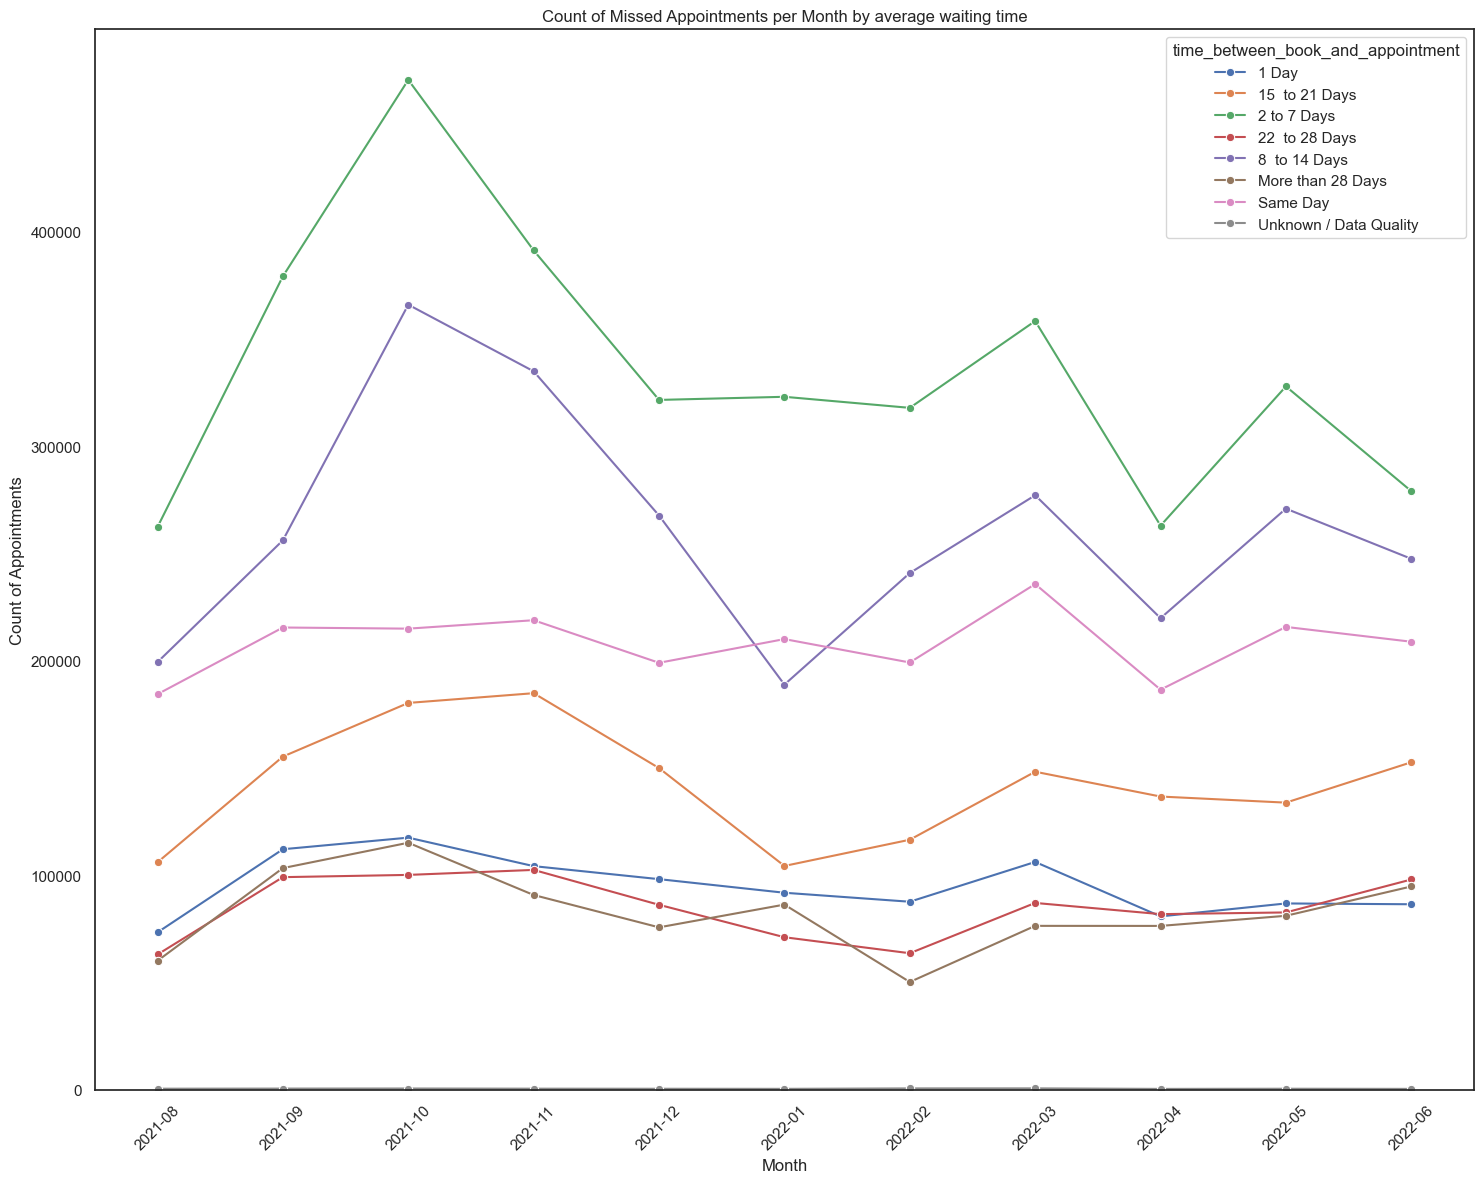

In [125]:
# Plot the relationship between missed appointments and the average waiting time

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a lineplot with Seaborn
ax = sns.lineplot(
    x='appointment_month', 
    y='count_of_appointments',
    hue='time_between_book_and_appointment',
    marker='o',
    errorbar=None,
    data=agg_by_time_between
)

# Set the y-axis limit to start at 0
ax.set_ylim(bottom=0)

# Set labels
ax.set_xlabel("Month")
ax.set_ylabel("Count of Appointments")
ax.set_title("Count of Missed Appointments per Month by average waiting time")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation.
plt.ticklabel_format(style='plain', axis='y')

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("Count of Missed Appointments per Month by average waiting time.png")

# Show the plot
plt.show()


##### Insights and recommendations
- 2 to 7 day and 8-14 day waiting time experience the most missed appointments.
- Could look at how appointment reminders are issued to patients over these time periods

##### Ideas for further analysis 

- Whats the relationship between missed appointments and geographical location? Or the weather?

## Section 6 - Identifying trends in X (FKA Twitter) engagement relating to healthcare in the UK

This section looks at the following questions:
- Q18: What do the tweet_retweet_count and tweet_favorite_count columns say about levels of engagement?
- Q19: What can be learnt from the top performing tweets based on tweet_retweet_count and tweet_favorite_count?
- Q20: What can be learnt from the most frequently used hashtags?

In [130]:
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [131]:
# View the DataFrame.

tweets.head(5)

,tweet_id,tweet_full_text,tweet_entities,tweet_entities_hashtags,tweet_metadata,tweet_retweet_count,tweet_favorite_count,tweet_favorited,tweet_retweeted,tweet_lang
0,1567629223795527681,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...","{'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en
1,1567582846612553728,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…,"{'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...","#PremiseHealth, #hiring","{'iso_language_code': 'en', 'result_type': 'recent'}",2,0,False,False,en
2,1567582787070304256,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…,"{'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...",#Healthcare,"{'iso_language_code': 'en', 'result_type': 'recent'}",39,0,False,False,en
3,1567582767625428992,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…,"{'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...",#NEW,"{'iso_language_code': 'en', 'result_type': 'recent'}",5,0,False,False,en
4,1567582720460570625,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...","{'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...","#blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare","{'iso_language_code': 'en', 'result_type': 'recent'}",0,0,False,False,en


**Question 18** What do the tweet_retweet_count and tweet_favorite_count columns say about X engagement on healthcase?

In [133]:
# Explore the tweet_retweet_count column
retweet_count_values = tweets['tweet_retweet_count'].value_counts()

# Explore the tweet_favorite_count column
favourite_count_values = tweets['tweet_favorite_count'].value_counts()

# Display the results
print("Value counts for tweet_retweet_count:")
print(retweet_count_values)

print("\nValue counts for tweet_favorite_count:")
print(favourite_count_values)


Value counts for tweet_retweet_count:
tweet_retweet_count
0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: count, dtype: int64

Value counts for tweet_favorite_count:
tweet_favorite_count
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: count, dtype: int64


##### Insight

- Looking at the tweet_retweet_count the majority of tweets (526) have 0 retweets suggesting a large proportion of low engagement
- the tweet_favourite_count also highlights a similar minimal engagement on tweets in terms of likes relating to healthcare with the significant majority of tweets (1027) have 0 favorites
- there are instances of high engagement (ie. either high_retweet_count or high_favourite_count) which should be looked at more closely to see if any patterns can be identified
- the majority of healthcare-related tweets in this dataset receive minimal interaction, indicating an area for potential improvement in engagement strategies.
- For better engagement, strategies could focus on understanding why certain tweets perform better and replicating those elements, such as relevant hashtags, engaging content, and timing of the posts.

In [135]:
**Question 19** What can be learnt from the top performing tweets in terms of tweet_retweet_count?

Object `tweet_retweet_count` not found.


In [136]:
# Sort the DataFrame by the 'tweet_retweet_count' column in descending order only on unique texts

# Remove duplicates based on the 'tweet_full_text' column
tweets_unique = tweets.drop_duplicates(subset='tweet_full_text')

# Sort the DataFrame by the 'tweet_retweet_count' column in descending order
tweets_sorted = tweets_unique.sort_values(by='tweet_retweet_count', ascending=False)

# Select the top 10 rows from the sorted DataFrame
top_10_tweets = tweets_sorted.head(10)

# Create a new DataFrame containing only the 'tweet_full_text' column of the top 10 tweets
top_10_tweets_text = top_10_tweets[['tweet_full_text','tweet_retweet_count']]

# View the DataFrame
top_10_tweets_text

,tweet_full_text,tweet_retweet_count
263,RT @UltimaLionsDen: Temitope is looking to boost efficiency in the Health industry with his app- \nWe-Care Africa. \n\nWas his pitch in good s…,303
27,"RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…",207
1130,RT @imedverse: I.V Drug Calculations Cheat Sheet\n\n@Pharma_Connect @imedverse #TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicar…,169
779,RT @Khulood_Almani: 🔟#Applications of #AI in #healthcare \n\nv/@ValueCoders\n \n#digitalhealth #Healthtech #Health #DataScience #Bigdata #Analy…,150
790,RT @Khulood_Almani: #Healthcare #DigitalTransformation Starts with This 6⃣Step Process\n\nv/@uptophealth\n#digitalhealth #AI #Python #DataScie…,107
65,"RT @SoniaFurstenau: Germany has one of the top ranked #healthcare systems in the world, while Canada’s is teetering. We both dedicate simil…",85
577,RT @imedverse: Features of Lung Diseases\n\n#pulmonary #pulmtwitter #pulmonology #pulmonary #respiratory #internalmedicine #TipsForNewDocs #M…,79
355,RT @Khulood_Almani: 🪑This #wearable Chair from Could be a Solution to many People’s Back Pain Due to Long Time Standing\n\n#wearable #healthc…,78
111,"RT @AWSCloudIndia: How is #data revolutionizing #healthcare? 💊 🚑 🏥 \n\nHear the prognosis from @DubeyPradeepK, Director of @intel's Parallel…",76
348,RT @healthcare_NFT_: Really excited to be working with @TheGivingBlock on what is proving to be a historic campaign. #HealthCare Heroes are…,73


In [137]:
# Sort the DataFrame by the 'tweet_favourite_count' column in descending order only on unique texts

# Remove duplicates based on the 'tweet_full_text' column
tweets_unique = tweets.drop_duplicates(subset='tweet_full_text')

# Sort the DataFrame by the 'tweet_retweet_count' column in descending order
tweets_sorted = tweets_unique.sort_values(by='tweet_favorite_count', ascending=False)

# Select the top 10 rows from the sorted DataFrame
top_10_tweets = tweets_sorted.head(10)

# Create a new DataFrame containing only the 'tweet_full_text' column of the top 10 tweets
top_10_tweets_text = top_10_tweets[['tweet_full_text','tweet_favorite_count']]

# View the DataFrame
top_10_tweets_text

,tweet_full_text,tweet_favorite_count
1156,Lipid-Lowering Drugs\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStudents #medstudenttwitter #lipid \n\nCredit: ...,42
9,You ready for $JCO @_JennyCo ❤️\n\n#Healthcare data powered by @Conste11ation $DAG 🔥,28
442,How health insurance works 😂 \n\n#comedy #adulting #healthcare https://t.co/ciksdeoAkb,20
84,"Our nat’l choices re: #healthcare systems aren’t the continuum of public or private, but how much we want of:\n\n- fragmented or seamless\n- does simplicity or complexity well\n- prioritizes savin...",18
1122,"Heart Failure, Myocardial Infarction &amp; immediate Treatment\n\n#TipsForNewDocs #MedEd #MedTwitter #medicine #medical #medicare #health #healthcare #FOAMed #ClinicalPearl #clinicaltips #MedStude...",17
119,"More data that our 13+ 🇨🇦 #healthcare systems fall short of providing adequate access to care, even for those w/ a family physician.\n\nInstead of siloed solutions and further system fragmentation...",14
758,Looking forward to speaking at #ConV2X on Sep 15! Ping me for a speaker discount if interested! Register at https://t.co/v20ebbXmdO \n\n.@BHTYjournal @hedera @acoerco\n#blockchain #DLT #healthcare...,13
1098,@CapricornFMNews We have waiting to hear this kind of news now Sa is getting things correct there is absolutely nothing mahala #HealthCare services in SA must be paid by foreign nationals and loca...,12
342,September is #WomenInMedicine Month! Thrilled to join @JulieSilverMD #SheLeadsHealthcare @ELAMProgram &amp; @AMWADoctors to #InvestInHer!\n\nI #InvestInHer to diversify the #healthcare #leadersh...,11
1093,Thanks &amp; Happy #WomenInMedicine Month to AMWA Board Member @SusanHingle! We appreciate your contributions to #Healthcare &amp; your leadership in AMWA! Learn about AMWA's community &amp; initi...,10


##### Insight 

Some useful insights here for driving future NHS engagement strategies
- popular topics of the most liked tweets involve innovation and technology and dicussing other healthcare systems (such as Germany and Canada)
- there is a lot of tweets involving well known people which receive higher engagement 
- frequent use of hashtags related to healthcare, technology, and education (#AI, #healthcare, #digitalhealth, #medicine) which likely increases their visibility
- There is nothing related to NHS capacity issues or missed appointments in these top performing tweets.

**Question 20** What can be learnt from the most frequently used hashtags?

In [140]:
# Create a new DataFrame containing only the text.

tweets_text = tweets[['tweet_full_text']]

# View the DataFrame.
tweets_text

,tweet_full_text
0,"As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be..."
1,RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed. We're #hiring for…
2,RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…
3,RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…
4,"ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di..."
...,...
1169,RT @PotomacPhotonic: Potomac #Innovation Report: #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…
1170,"Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie..."
1171,"The @hfmaorg Region 9 presents ""The Value of ESG to the Healthcare Industry"" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp..."
1172,Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC


In [141]:
# Initialize an empty list to store the hashtags
hashtags = []

# Loop through the messages, and create a list of values containing the # symbol.

for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase.
           hashtags.append(z.lower())

# Print the list of hashtags
print(hashtags)


['#healthcare', '#premisehealth', '#hiring', '#healthcare', '🚨#new:🚨', 'look!\n\n#blogs', '#digitaltransformation', '#cybersecurity', '#accounting', '#finance', '#healthcare', 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna', '#cnaexam', '#cnaexampreparation', '#jacksonville', '#cnatraining', '#nurse', '#nursing', '#nurselife', '#nursepractitioner', '#nurseproblems', '#nursingschool', '#healthcare', '🚨#new:🚨', '#disparities.', '@karahartnett\n#healthcare', '#alert', '#insurance', '#data\nhttps://t.co/h9hlamr7p9', '#healthcare', '#healthcare', '❤️\n\n#healthcare', '#healthcare', '#hcldr', '#premisehealth', '#hiring', '#premisehealth', '#hiring', '#healthcare', '#qualitypatientcare', '#jobs', '#job', '#ascp2022', '#ascp100.', '#healthcare', '#healthsecretary', '#healthcare', '#ai,', '#sdoh,', '#healthcare', '\nhttps://t.co/ewe7jntj1e\n#tropicana', '#real', '#juice', '#healthcare', '#watch', '#worms', '#fruits', '#healthtips', '#tips', '#healthcare', '#thewoodlands,', '#healthcare', '#chicago

In [142]:
# Display the first 30 records.
# Display the first 30 records from the tags list
print(hashtags[:30])

['#healthcare', '#premisehealth', '#hiring', '#healthcare', '🚨#new:🚨', 'look!\n\n#blogs', '#digitaltransformation', '#cybersecurity', '#accounting', '#finance', '#healthcare', 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna', '#cnaexam', '#cnaexampreparation', '#jacksonville', '#cnatraining', '#nurse', '#nursing', '#nurselife', '#nursepractitioner', '#nurseproblems', '#nursingschool', '#healthcare', '🚨#new:🚨', '#disparities.', '@karahartnett\n#healthcare', '#alert', '#insurance', '#data\nhttps://t.co/h9hlamr7p9', '#healthcare']


In [143]:
# Convert the series to a DataFrame in preparation for visualisation.

# Convert the tags list to a DataFrame
hashtags_df = pd.DataFrame(hashtags, columns=['hashtags'])

# Count the occurrences of each hashtag
hashtag_counts = hashtags_df['hashtags'].value_counts()

# Convert the Series into a DataFrame
data = hashtag_counts.reset_index()

# Rename the columns.
data.columns = ['word', 'count']

# View the dataframe
data

,word,count
0,#healthcare,716
1,#health,80
2,#medicine,41
3,#ai,40
4,#job,38
...,...,...
1749,#evestudy,1
1750,#patientdata…,1
1751,#secure,1
1752,#sms,1


In [144]:
# Fix the count datatype.

# Ensure 'count' is an integer
data['count'] = data['count'].astype(int)

# View the result.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    1754 non-null   object
 1   count   1754 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 27.5+ KB


In [145]:
# Display records where the count is larger than 10.

# Display the first 30 records of the DataFrame
data_filtered = data[data['count'] > 10]

# Sense-check the DataFrame
print(data_filtered.head(10))
print(data_filtered.describe())

              word  count
0      #healthcare    716
1          #health     80
2        #medicine     41
3              #ai     40
4             #job     38
5         #medical     35
6        #strategy     30
7  #pharmaceutical     28
8   #digitalhealth     25
9          #pharma     25
       count
count     47
mean      34
std      102
min       11
25%       13
50%       16
75%       24
max      716


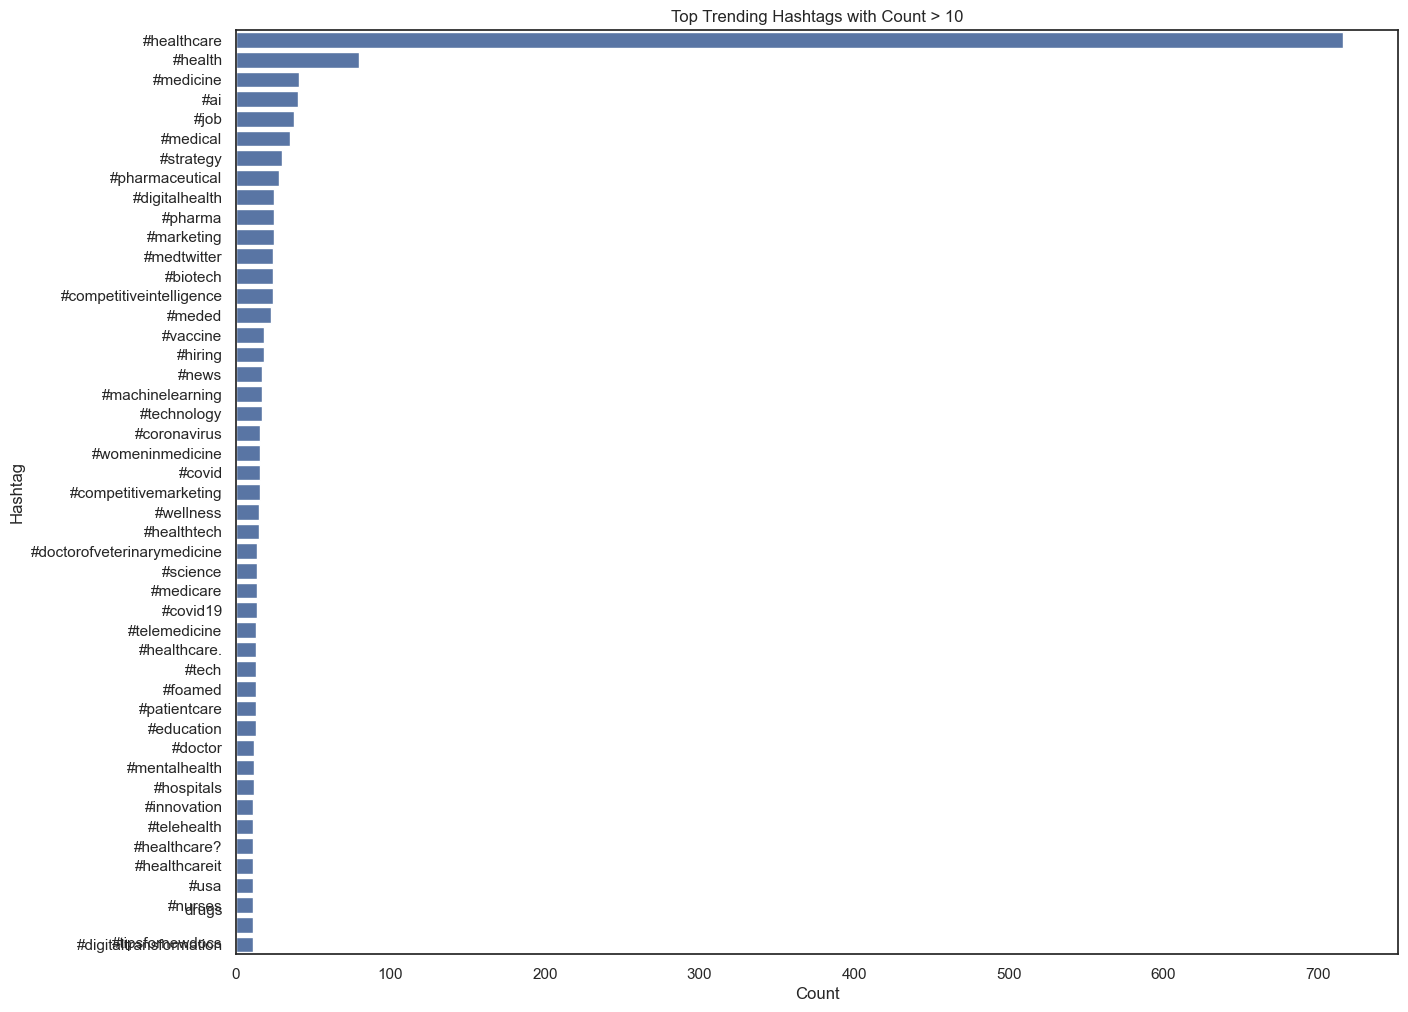

In [146]:
# Create a Seaborn barplot indicating records with a count >10 records.
# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot indicating records with a count >10 records.
sns.barplot(x='count', y='word', data=data_filtered)

# Add plot title and axis labels
plt.title('Top Trending Hashtags with Count > 10')
plt.xlabel('Count')
plt.ylabel('Hashtag')

# Save the plot as a PNG file
plt.savefig("Top Trending Hashtags relating to healthcare in the UK.png")

# View the barplot
plt.show()


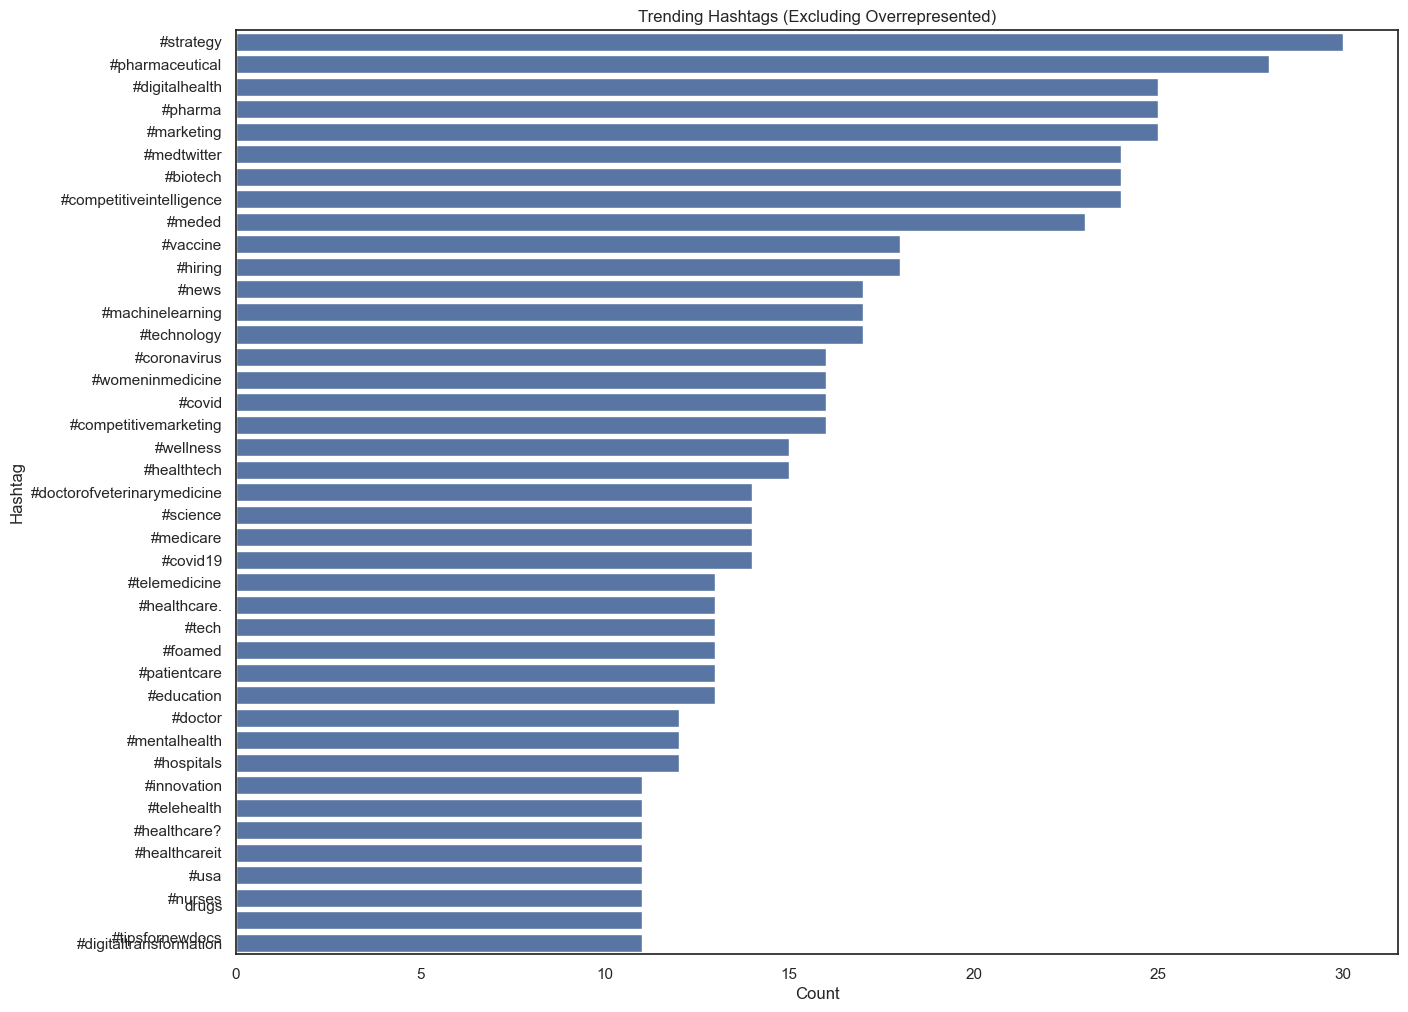

In [147]:
# Remove any overrepresented hashtags (e.g., if you want to exclude those with extremely high counts)
# For this example, assume 'overrepresented' is defined as having a count greater than 30
filtered_data = data_filtered[data_filtered['count'] <= 30]

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Create a Seaborn barplot for the remaining hashtags
sns.barplot(x='count', y='word', data=filtered_data)

# Add plot title and axis labels
plt.title('Trending Hashtags (Excluding Overrepresented)')
plt.xlabel('Count')
plt.ylabel('Hashtag')

# View the barplot.
plt.show()


##### Insight

- The most frequently used hashtag is #healthcare with 716 occurrences, followed by #health (80), #medicine (41), and #ai (40). The NHS should consider using these popular hashtags to increase the reach and engagement of their tweets
- An example could participate in conversations around #ai if NHS are using any AI-based solutions to reduce missed appointments
- Share educational content using popular hashtags to inform patients about the impact of missed appointments and the importance of attending scheduled visits.


### Provide a summary of your findings and recommendations based on the analysis.

**Conclusions**
- There is no  capacity issue in the networks suggesting the problem of missed appointments is not related to a capacity problem. 
- Same-day appointments, despite being the most frequent, were missed less often than those with longer waiting periods.
- Telephone appointments have a much lower % rate of missed appointments compared to face to face appointments
- A significantly higher proportion of appointments are missed when held by other practice staff rather than GPs when they have similar -total number of appointments.
- The most frequently used hashtag is #healthcare with 716 occurrences, followed by #health (80), #medicine (41), and #ai (40). 

**Recommendations for further exploration**
- Can the NHS conduct more Telephone or Video / Online appointments which have a lower rate of being missed than face to face appointments
- The NHS should explore how appointment reminders are issued to patients with longer appointment waiting periods who miss proportionately more appointments.
- The NHS should explore why more appointments are missed by other practice staff. 
- The NHS should consider using the most popular hashtags to increase the reach and engagement of their tweets. An example could participate in conversations around #ai if NHS are using any AI-based solutions to reduce missed appointments



## ADDTIONAL SECTION - calculating % for CV report

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets (assuming you've loaded them already)
ar = pd.read_csv('appointments_regional.csv')


In [153]:
# Step 1: Filter the data for missed and total appointments
missed_appointments = ar[ar['appointment_status'] == 'Missed']

# Step 2: Group the data to get the total number of appointments and missed appointments
total_appointments = ar.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()
missed_appointments_grouped = missed_appointments.groupby(['appointment_month', 'appointment_mode'])['count_of_appointments'].sum().reset_index()

# Step 3: Merge the total and missed appointments to calculate the missed rate
merged_data = pd.merge(
    total_appointments, 
    missed_appointments_grouped, 
    on=['appointment_month', 'appointment_mode'], 
    suffixes=('_total', '_missed'),
    how='left'
)

# Step 4: Fill NaN values in the missed appointments count with 0 (no missed appointments in those months)
merged_data['count_of_appointments_missed'] = merged_data['count_of_appointments_missed'].fillna(0)

# Step 5: Calculate the missed appointment rate
merged_data['missed_appointment_rate'] = (merged_data['count_of_appointments_missed'] / merged_data['count_of_appointments_total']) * 100



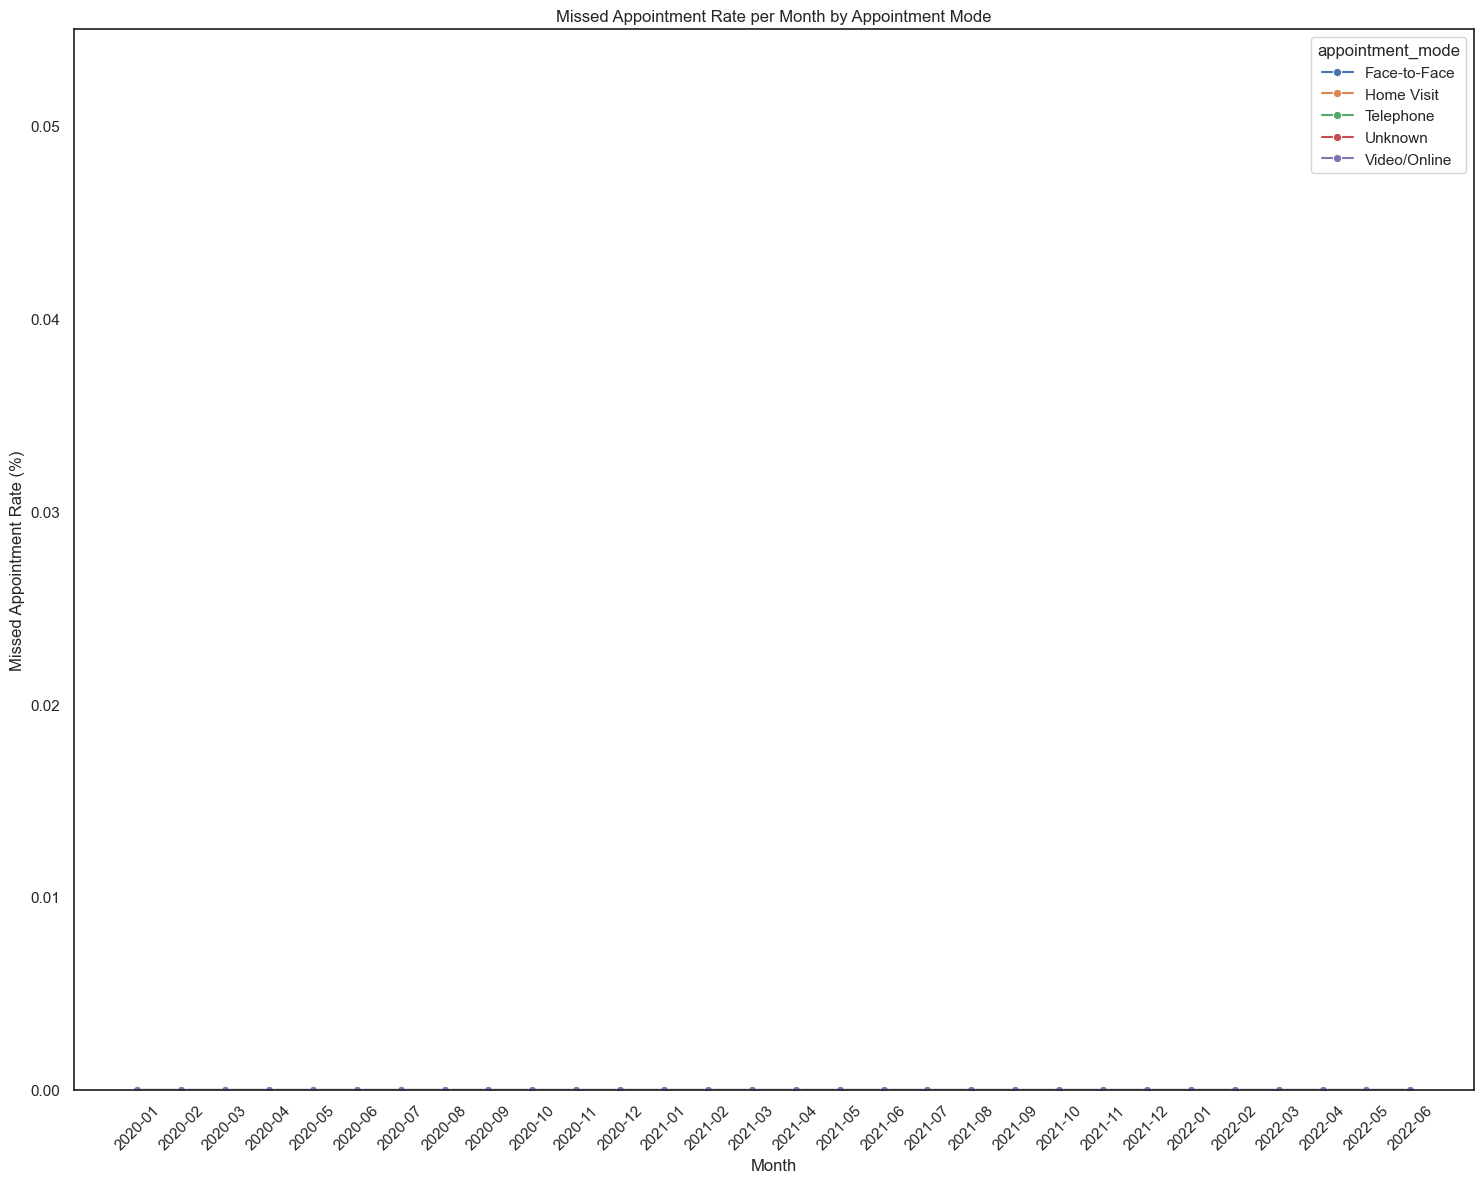

In [154]:
# Set figure size
sns.set(rc={'figure.figsize': (15, 12)})

# Set the plot style as white
sns.set_style('white')

# Create a lineplot to visualize the missed appointment rate by appointment mode
ax = sns.lineplot(
    x='appointment_month', 
    y='missed_appointment_rate',
    hue='appointment_mode',
    marker='o',
    data=merged_data
)

# Set the y-axis limit to start at 0
ax.set_ylim(bottom=0)

# Set labels
ax.set_xlabel("Month")
ax.set_ylabel("Missed Appointment Rate (%)")
ax.set_title("Missed Appointment Rate per Month by Appointment Mode")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Rescale the tick labels on the y axis to prevent scientific notation
plt.ticklabel_format(style='plain', axis='y')

# Adjust layout
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("Missed_Appointment_Rate_by_Appointment_Mode.png")

# Show the plot
plt.show()


In [155]:
import pandas as pd

# Step 1: Group total appointments by appointment_mode
total_appointments = filtered_ar.groupby('appointment_mode')['count_of_appointments'].sum().reset_index()

# Step 2: Group missed appointments by appointment_mode (use 'DNA' for missed appointments)
missed_appointments = ar_missed_app.groupby('appointment_mode')['count_of_appointments'].sum().reset_index()

# Step 3: Merge the total and missed appointments
merged_data = pd.merge(
    total_appointments, 
    missed_appointments, 
    on='appointment_mode', 
    suffixes=('_total', '_missed'),
    how='left'
)

# Step 4: Fill NaN values in missed appointments with 0
merged_data['count_of_appointments_missed'].fillna(0, inplace=True)

# Step 5: Calculate the percentage of each appointment mode type
total_all_appointments = merged_data['count_of_appointments_total'].sum()
merged_data['percentage_of_total_appointments'] = (merged_data['count_of_appointments_total'] / total_all_appointments) * 100

# Step 6: Calculate the missed appointment rate for each appointment mode
merged_data['percentage_missed'] = (merged_data['count_of_appointments_missed'] / merged_data['count_of_appointments_total']) * 100

# Step 7: Rename columns for better clarity
merged_data.rename(columns={
    'count_of_appointments_total': 'Total Appointments',
    'count_of_appointments_missed': 'Missed Appointments',
    'percentage_of_total_appointments': '% of Total Appointments',
    'percentage_missed': '% Missed Appointments'
}, inplace=True)

# Step 8: Display the final table
merged_data = merged_data[['appointment_mode', 'Total Appointments', '% of Total Appointments', 'Missed Appointments', '% Missed Appointments']]
print(merged_data)


  appointment_mode  Total Appointments  % of Total Appointments  Missed Appointments  % Missed Appointments
0     Face-to-Face           183503587                       62             10762022                      6
1       Home Visit             1991144                        1                78476                      4
2        Telephone           100274881                       34              2094584                      2
3          Unknown             8733661                        3               305774                      4
4     Video/Online             1543497                        1                77528                      5
